In [342]:
%matplotlib inline

import os
import IPython.display as ipd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys

# Read the Dataset

In [3]:
## Explore the Dataset

https://www.kaggle.com/zaheenhamidani/ultimate-spotify-tracks-db

In [4]:
df = pd.read_csv('SpotifyFeatures.csv')
df.shape

(232725, 18)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 18 columns):
genre               232725 non-null object
artist_name         232725 non-null object
track_name          232725 non-null object
track_id            232725 non-null object
popularity          232725 non-null int64
acousticness        232725 non-null float64
danceability        232725 non-null float64
duration_ms         232725 non-null int64
energy              232725 non-null float64
instrumentalness    232725 non-null float64
key                 232725 non-null object
liveness            232725 non-null float64
loudness            232725 non-null float64
mode                232725 non-null object
speechiness         232725 non-null float64
tempo               232725 non-null float64
time_signature      232725 non-null object
valence             232725 non-null float64
dtypes: float64(9), int64(2), object(7)
memory usage: 32.0+ MB


In [6]:
genre_count = df.groupby('genre').agg({'genre':'count'})['genre']
print(genre_count)

genre
A Capella            119
Alternative         9263
Anime               8936
Blues               9023
Children's Music    5403
Children’s Music    9353
Classical           9256
Comedy              9681
Country             8664
Dance               8701
Electronic          9377
Folk                9299
Hip-Hop             9295
Indie               9543
Jazz                9441
Movie               7806
Opera               8280
Pop                 9386
R&B                 8992
Rap                 9232
Reggae              8771
Reggaeton           8927
Rock                9272
Ska                 8874
Soul                9089
Soundtrack          9646
World               9096
Name: genre, dtype: int64


In [7]:
df.loc[(df.genre == """Children’s Music"""),'genre']="""Children's Music"""
df

genre               artist_name                        track_name  \
0       Movie            Henri Salvador       C'est beau de faire un Show   
1       Movie         Martin & les fées  Perdu d'avance (par Gad Elmaleh)   
2       Movie           Joseph Williams    Don't Let Me Be Lonely Tonight   
3       Movie            Henri Salvador    Dis-moi Monsieur Gordon Cooper   
4       Movie              Fabien Nataf                         Ouverture   
...       ...                       ...                               ...   
232720   Soul                     Slave                      Son Of Slide   
232721   Soul  Jr Thomas & The Volcanos                      Burning Fire   
232722   Soul              Muddy Waters    (I'm Your) Hoochie Coochie Man   
232723   Soul                   R.LUM.R                     With My Words   
232724   Soul            Mint Condition    You Don't Have To Hurt No More   

                      track_id  popularity  acousticness  danceability  \
0       0BRjO6ga9RKCKjfDqeFgWV           0       0.61100         0.389   
1       0BjC1NfoEOOusryehmNudP           1       0.24600         0.590   
2       0CoSDzoNIKCRs124s9uTVy           3       0.95200         0.663   
3       0Gc6TVm52BwZD07Ki6tIvf           0       0.70300         0.240   
4       0IuslXpMROHdEPvSl1fTQK           4       0.95000         0.331   
...                        ...         ...           ...           ...   
232720  2XGLdVl7lGeq8ksM6Al7jT          39       0.00384         0.687   
232721  1qWZdkBl4UVPj9lK6HuuFM          38       0.03290         0.785   
232722  2ziWXUmQLrXTiYjCg2fZ2t          47       0.90100         0.517   
232723  6EFsue2YbIG4Qkq8Zr9Rir          44       0.26200         0.745   
232724  34XO9RwPMKjbvRry54QzWn          35       0.09730         0.758   

        duration_ms  energy  instrumentalness key  liveness  loudness   mode  \
0             99373   0.910          0.000000  C#    0.3460    -1.828  Major   
1            137373   0.737          0.000000  F#    0.1510    -5.559  Minor   
2            170267   0.131          0.000000   C    0.1030   -13.879  Minor   
3            152427   0.326          0.000000  C#    0.0985   -12.178  Major   
4             82625   0.225          0.123000   F    0.2020   -21.150  Major   
...             ...     ...               ...  ..       ...       ...    ...   
232720       326240   0.714          0.544000   D    0.0845   -10.626  Major   
232721       282447   0.683          0.000880   E    0.2370    -6.944  Minor   
232722       166960   0.419          0.000000   D    0.0945    -8.282  Major   
232723       222442   0.704          0.000000   A    0.3330    -7.137  Major   
232724       323027   0.470          0.000049  G#    0.0836    -6.708  Minor   

        speechiness    tempo time_signature  valence  
0            0.0525  166.969            4/4    0.814  
1            0.0868  174.003            4/4    0.816  
2            0.0362   99.488            5/4    0.368  
3            0.0395  171.758            4/4    0.227  
4            0.0456  140.576            4/4    0.390  
...             ...      ...            ...      ...  
232720       0.0316  115.542            4/4    0.962  
232721       0.0337  113.830            4/4    0.969  
232722       0.1480   84.135            4/4    0.813  
232723       0.1460  100.031            4/4    0.489  
232724       0.0287  113.897            4/4    0.479  

[232725 rows x 18 columns]

In [8]:
### Normalize Tempo column
from sklearn.preprocessing import Normalizer, MinMaxScaler

df['tempo'] = MinMaxScaler().fit_transform(df['tempo'].values.reshape(-1,1))
df['tempo'].head()

0    0.642704
1    0.675801
2    0.325182
3    0.665238
4    0.518516
Name: tempo, dtype: float64

In [9]:
### Isolate audio features into one dataframe
audio_cols = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness', 'tempo', 'valence']
audio_features = df[audio_cols]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002385709EB08>,
      dtype=object)

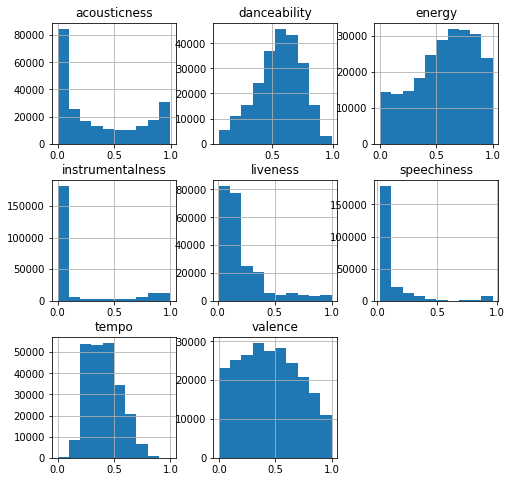

In [10]:
audio_features.hist(figsize=(8,8))


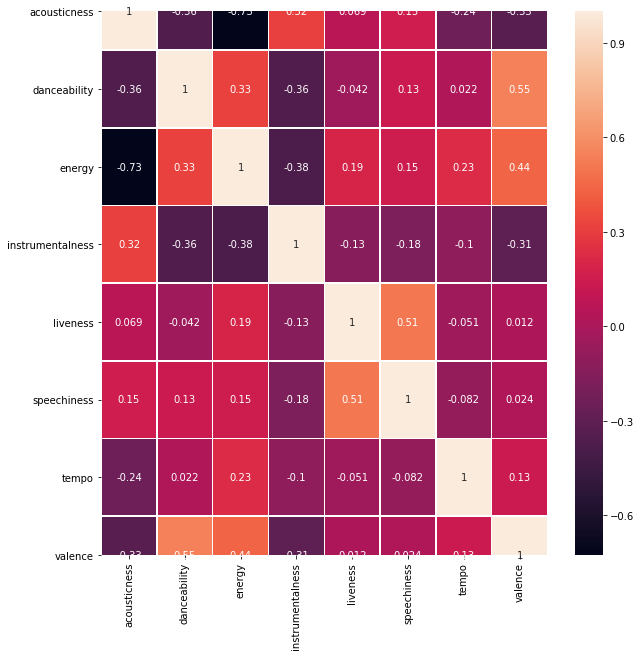

In [11]:
plt.figure(figsize=(10,10))
corr = audio_features.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
           annot=True,
           linewidth=0.5)
plt.savefig('audio_heatmap.png')

In [12]:
df.sort_values('genre', inplace=True)


In [13]:
n_genres = len(df['genre'].unique())


C:\Users\md\Anaconda3\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1, 'Energy vs. Acousticness')

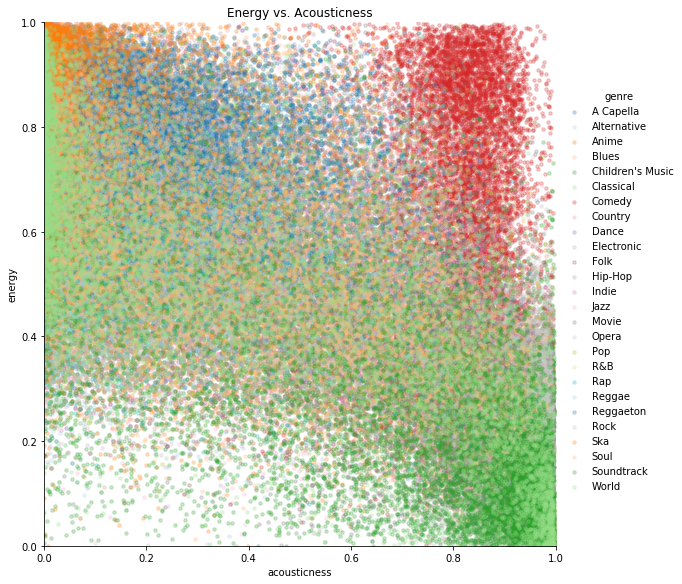

In [14]:
sns.lmplot(data=df, x="acousticness", y="energy", hue="genre", palette='tab20',
           fit_reg=False, legend=True, size=8, scatter_kws={'alpha':0.25, 's':12})
plt.xlim(0,1.0)
plt.ylim(0,1.0)
plt.title("Energy vs. Acousticness")

Text(0.5, 1, 'Instrumentalness vs. Acousticness')

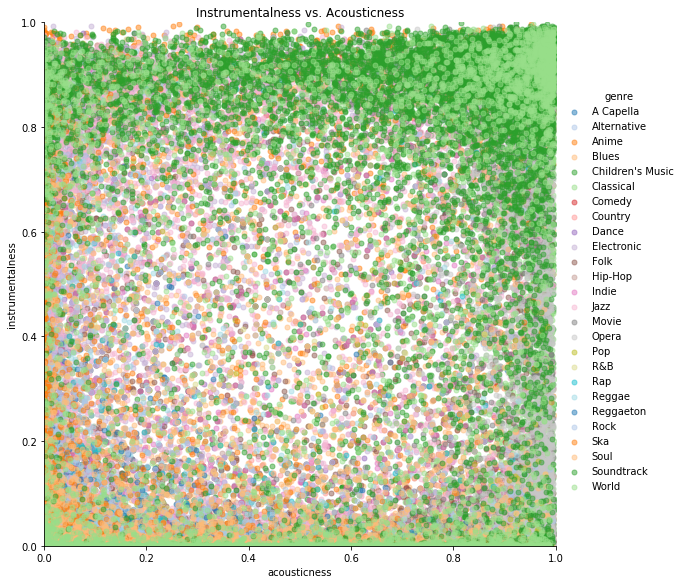

In [15]:

sns.lmplot(data=df, x="acousticness", y="instrumentalness", hue="genre", palette="tab20",
           fit_reg=False, legend=True, size=8, 
           scatter_kws={'alpha':0.5, 's':25})
plt.xlim(0,1.0)
plt.ylim(0,1.0)
plt.title("Instrumentalness vs. Acousticness")

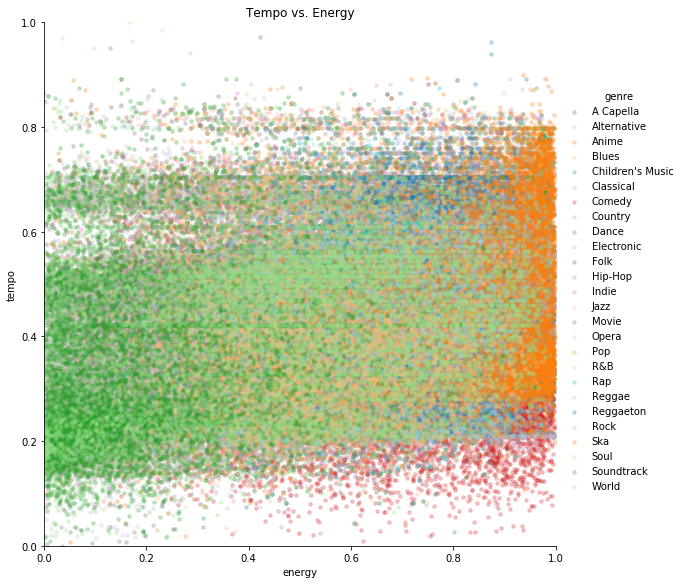

In [16]:
sns.lmplot(data=df, x="energy", y="tempo", hue="genre", palette="tab20",
           fit_reg=False, legend=True, size=8,
          scatter_kws={'alpha':0.25, 's':12})
plt.xlim(0,1.0)
plt.ylim(0,1.0)
plt.title("Tempo vs. Energy")
plt.savefig('tempo_v_energy.png')

Text(0.5, 1, 'Danceability vs. Valence')

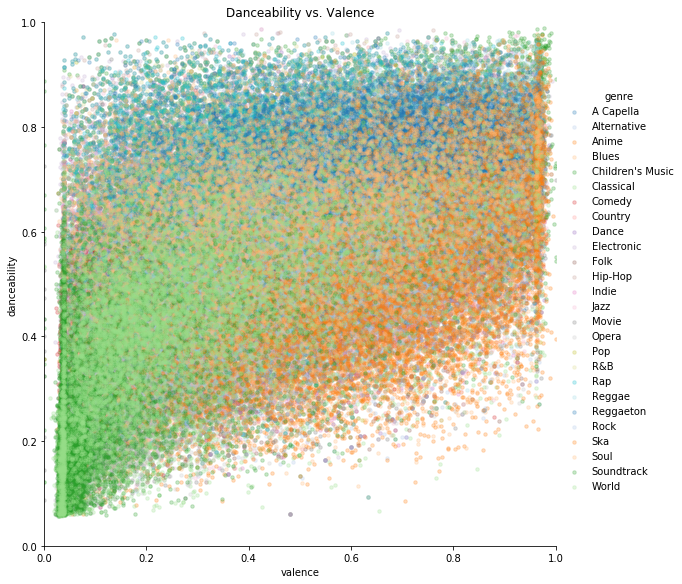

In [17]:
sns.lmplot(data=df, x="valence", y="danceability", hue="genre", palette="tab20",
           fit_reg=False, legend=True, size=8,
          scatter_kws={'alpha':0.25, 's':12})
plt.xlim(0,1.0)
plt.ylim(0,1.0)
plt.title("Danceability vs. Valence")

Text(0.5, 1, 'Valence vs. Energy')

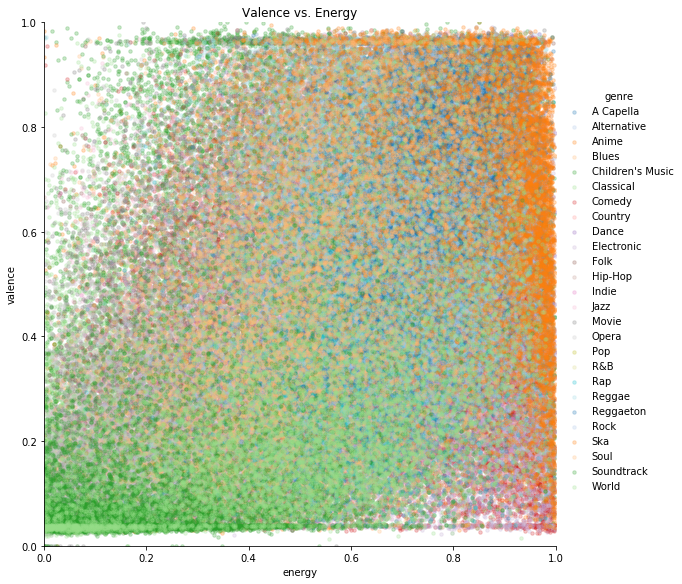

In [18]:

sns.lmplot(data=df, x="energy", y="valence", hue="genre", palette="tab20",
           fit_reg=False, legend=True, size=8, 
          scatter_kws={'alpha':0.25, 's':12})
plt.xlim(0,1.0)
plt.ylim(0,1.0)
plt.title("Valence vs. Energy")

### Box-Plots of Audio Features By Genre

In [19]:

### Create a sample of 300 songs from each top genre
k = 6
sample_size = 300
top_k_genres = df.genre.value_counts().index.values[:k]
top_k_genres = sorted(top_k_genres)
df_sample = pd.DataFrame()
for genre in top_k_genres:
    df_sample = pd.concat([df.loc[df.genre==genre].sample(sample_size, random_state=1986), df_sample])
df_sample.genre.value_counts()

Pop                 300
Soundtrack          300
Children's Music    300
Indie               300
Comedy              300
Jazz                300
Name: genre, dtype: int64

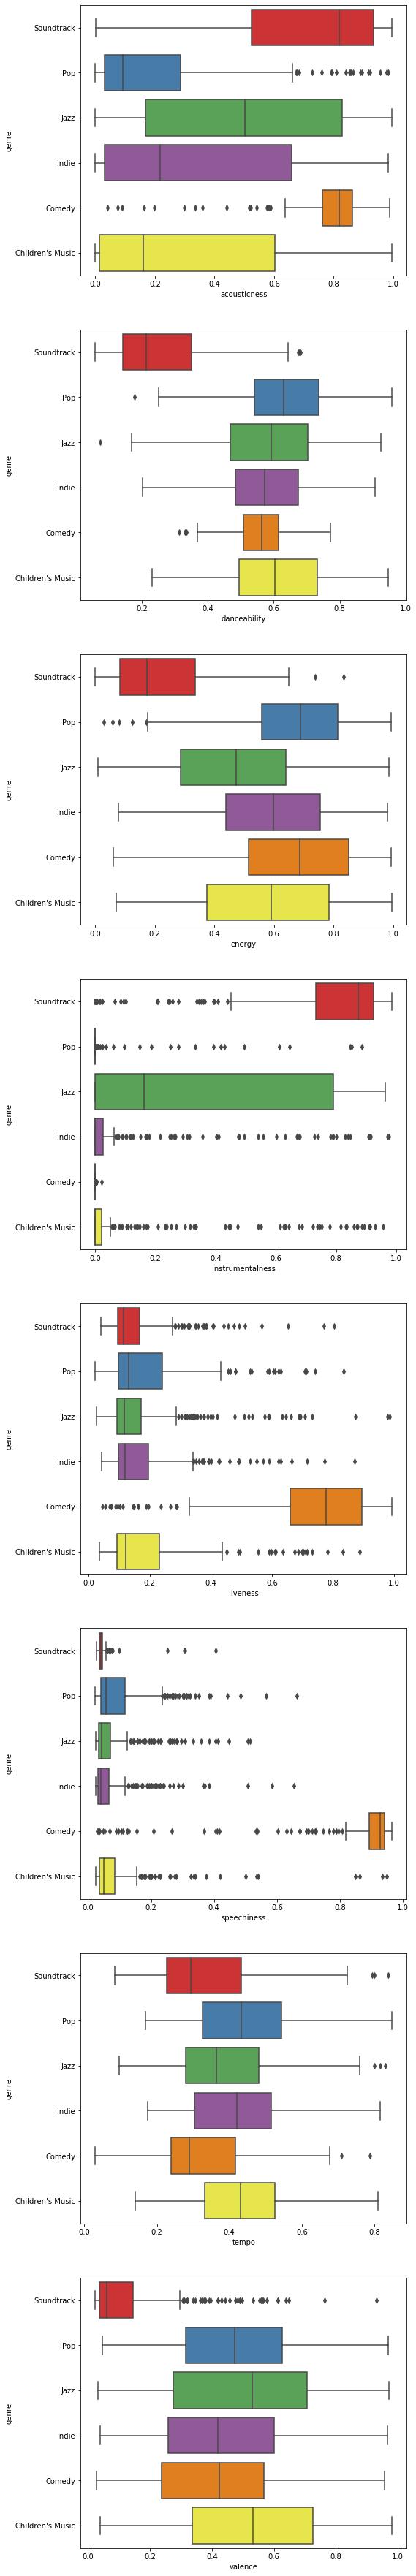

In [20]:
audio_cols = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness', 'tempo', 'valence']
n_features = len(audio_cols)

fig, axes = plt.subplots(n_features, 1, figsize=(8,8*n_features))

for i in range(n_features):
    ax = axes[i]
    feature = audio_cols[i]
    sns.boxplot(x=feature, y='genre', data=df_sample, ax=ax, palette='Set1')

### I. Genre Clustering


In [423]:
%matplotlib inline

import ast
import IPython.display as ipd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import Normalizer, MinMaxScaler
from sklearn.cluster import MeanShift, KMeans, AffinityPropagation, AgglomerativeClustering, FeatureAgglomeration, SpectralClustering, estimate_bandwidth
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score, silhouette_score, v_measure_score
#from sklearn import cluster

In [22]:
genre_count = df.groupby('genre').agg({'genre':'count'})['genre']
print(genre_count)

genre
A Capella             119
Alternative          9263
Anime                8936
Blues                9023
Children's Music    14756
Classical            9256
Comedy               9681
Country              8664
Dance                8701
Electronic           9377
Folk                 9299
Hip-Hop              9295
Indie                9543
Jazz                 9441
Movie                7806
Opera                8280
Pop                  9386
R&B                  8992
Rap                  9232
Reggae               8771
Reggaeton            8927
Rock                 9272
Ska                  8874
Soul                 9089
Soundtrack           9646
World                9096
Name: genre, dtype: int64


In [23]:
genre_groupby = df.groupby('genre').agg('mean')
clusters = genre_groupby.reset_index().rename({'genres_top':'cluster'}, axis=1)
clusters['method'] = 'Mean'

clusters

genre  popularity  acousticness  danceability    duration_ms  \
0          A Capella    9.302521      0.829941      0.412252  204467.697479   
1        Alternative   50.213430      0.162313      0.541898  233241.364245   
2              Anime   24.258729      0.286843      0.472090  229937.067927   
3              Blues   34.742879      0.327840      0.528232  251931.826000   
4   Children's Music   36.202426      0.320112      0.598829  199663.490919   
5          Classical   29.282195      0.868843      0.305958  310339.983578   
6             Comedy   21.342630      0.793098      0.559038  235305.210102   
7            Country   46.100416      0.270172      0.577038  217237.527008   
8              Dance   57.275256      0.152888      0.638191  226264.941846   
9         Electronic   38.056095      0.119839      0.619542  269195.980164   
10              Folk   49.940209      0.463201      0.527276  235805.456608   
11           Hip-Hop   58.423131      0.176172      0.718808  219981.913179   
12             Indie   54.701561      0.331214      0.566821  224150.373991   
13              Jazz   40.824383      0.499606      0.585638  265645.269887   
14             Movie   12.174097      0.697341      0.491186  210405.351653   
15             Opera   13.335628      0.945202      0.290650  259161.092271   
16               Pop   66.590667      0.224819      0.640236  220859.160239   
17               R&B   52.308719      0.288216      0.642125  225748.130227   
18               Rap   60.533795      0.168080      0.697244  219853.858102   
19            Reggae   35.589328      0.185783      0.699271  239503.539391   
20         Reggaeton   37.742915      0.218923      0.731260  232037.139128   
21              Rock   59.619392      0.196429      0.538292  237003.226920   
22               Ska   28.612351      0.099728      0.526799  191548.603899   
23              Soul   47.027836      0.360679      0.617645  234714.359225   
24        Soundtrack   33.954800      0.717349      0.265616  192611.748808   
25             World   35.524077      0.393341      0.443293  315327.891931   

      energy  instrumentalness  liveness   loudness  speechiness     tempo  \
0   0.250313          0.007491  0.136924 -13.660387     0.042414  0.381792   
1   0.711519          0.061303  0.196985  -6.540803     0.088783  0.433624   
2   0.665356          0.280592  0.192391  -7.917802     0.065102  0.452891   
3   0.606171          0.095175  0.233125  -9.053807     0.061809  0.427051   
4   0.593204          0.087013  0.183986  -8.399591     0.097763  0.429407   
5   0.177984          0.599425  0.162810 -21.544477     0.052001  0.348021   
6   0.676094          0.000574  0.724775 -11.689321     0.853532  0.319289   
7   0.636318          0.005610  0.187216  -7.341693     0.048989  0.437764   
8   0.698067          0.035449  0.187753  -6.054241     0.083608  0.425443   
9   0.739299          0.350955  0.210006  -7.035868     0.098988  0.449206   
10  0.491733          0.084934  0.170773  -9.870282     0.045077  0.415811   
11  0.643275          0.011200  0.201146  -6.860286     0.205396  0.425420   
12  0.581002          0.085317  0.168919  -7.915142     0.066724  0.418361   
13  0.472776          0.358009  0.173355 -11.210457     0.072304  0.383037   
14  0.370703          0.125427  0.228715 -12.952094     0.109400  0.393216   
15  0.168779          0.232013  0.223264 -19.339767     0.059720  0.336075   
16  0.642208          0.016599  0.179967  -6.495423     0.107963  0.427231   
17  0.564248          0.025558  0.175350  -7.597064     0.120994  0.404636   
18  0.650520          0.009317  0.198939  -6.669916     0.188186  0.426878   
19  0.635749          0.039972  0.193076  -7.518107     0.116163  0.413052   
20  0.748836          0.003666  0.207510  -5.875960     0.127616  0.426345   
21  0.683670          0.053288  0.186981  -7.285875     0.053664  0.434072   
22  0.815585          0.056709  0.243473  -6.172705     0.089158  0.466059   
23  0.532

C:\Users\md\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\hist.py:412: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  ax.hist(data[col].dropna().values, bins=bins, **kwds)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000151459F4B48>,
      dtype=object)

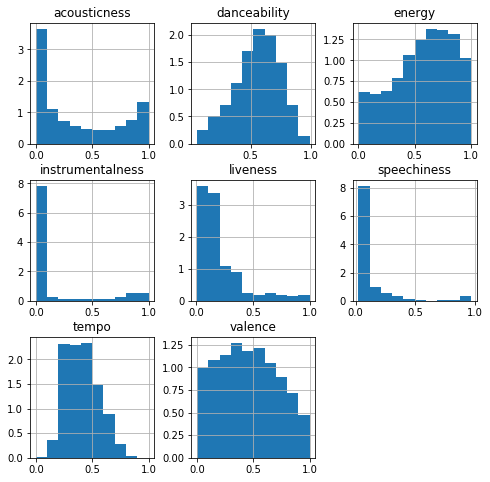

In [163]:
df[audio_cols].hist(figsize=(8,8), normed=True)


### Clustering on all genres:


In [374]:
df

genre                      artist_name  \
644     A Capella                    Hyannis Sound   
583     A Capella                             Glad   
584     A Capella            The Singers Unlimited   
585     A Capella                             Glad   
586     A Capella            The Singers Unlimited   
...           ...                              ...   
217259      World                 Vertical Worship   
217258      World  A Winged Victory for the Sullen   
217257      World                      Bing & Ruth   
217453      World                  Desert Dwellers   
211111      World               David Crowder Band   

                                        track_name                track_id  \
644                   Absolutely (Story of a Girl)  4cDYqCte9iuEweE5fCwtaP   
583                      O Sacred Head Now Wounded  4T0MhF3l1r8GGjVu9D68LG   
584                Killing Me Softly with His Song  5QP9P48x0NmnLhCTRg3CYU   
585              All Hail the Power of Jesus' Name  1uooaC1KFcxzYbiHpbP0hi   
586                                 Both Sides Now  3zFfH4tfGuVWbjNdNUX9QI   
...                                            ...                     ...   
217259                       Let Everything - Live  5jjZbjn3zBLJq9XnocHtdj   
217258                    All Farewells Are Sudden  6O2G8SEQDUjtH3kABozhOu   
217257          Police Police Police Police Police  520O1PdpWctegsmV3jQvTO   
217453                               Seeing Things  5T0McCOkQBktSu6oSDpDpV   
211111  No One Like You - Illuminate Album Version  7KqcDy2NC8tF5bFtV8SlsZ   

        popularity  acousticness  danceability  duration_ms  energy  \
644              1      0.575000         0.616       164280  0.5690   
583             10      0.793000         0.315       167760  0.1870   
584             14      0.962000         0.255       260067  0.1400   
585             10      0.733000         0.487       177640  0.2630   
586             13      0.970000         0.303       182002  0.1180   
...            ...           ...           ...          ...     ...   
217259          31      0.049100         0.562       223147  0.9180   
217258          31      0.907000         0.161       455587  0.0447   
217257          34      0.992000         0.196       364043  0.1490   
217453          29      0.000658         0.625       420595  0.7600   
211111          33      0.001030         0.289       232520  0.8210   

        instrumentalness  ... speechiness     tempo  time_signature valence  \
644             0.000000  ...      0.0583  0.331854             4/4  0.7170   
583             0.000000  ...      0.0284  0.237648             4/4  0.1900   
584             0.001050  ...      0.0285  0.279314             4/4  0.1540   
585             0.000000  ...      0.0334  0.531182             3/4  0.5570   
586             0.000012  ...      0.0539  0.198603             4/4  0.1220   
...                  ...  ...         ...       ...             ...     ...   
217259          0.000080  ...      0.0373  0.402684             4/4  0.4020   
217258          0.896000  ...      0.0435  0.475278             4/4  0.0286   
217257          0.826000  ...      0.0328  0.235159             4/4  0.0843   
217453          0.790000  ...      0.0409  0.539299             4/4  0.5020   
211111          0.000013  ...      0.0682  0.689550             4/4  0.4560   

        KMeansLabel         x         y         z     x_lda     y_lda  
644             KM1 -0.010190  0.201047 -0.312842 -0.010190  0.201047  
583             KM3  0.564620  0.231898  0.078087  0.564620  0.231898  
584             KM3  0.723679  0.283851  0.052733  0.723679  0.283851  
585             KM1  0.304085  0.277224 -0.205281  0.304085  0.277224  
586             KM3  0.746753  0.288930  0.038331  0.746753  0.288930  
...             ...       ...       ...       ...       ...       ...  
217259          KM4 -0.418228 -0.156892  0.133588 -0.418228 -0.156892  
217258          KM5  1.136295 -0.400781  0.04811

In [373]:
X = df[['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness', 'tempo', 'valence']]
X

acousticness  danceability  energy  instrumentalness  liveness  \
644         0.575000         0.616  0.5690          0.000000    0.0833   
583         0.793000         0.315  0.1870          0.000000    0.2250   
584         0.962000         0.255  0.1400          0.001050    0.1700   
585         0.733000         0.487  0.2630          0.000000    0.2330   
586         0.970000         0.303  0.1180          0.000012    0.1200   
...              ...           ...     ...               ...       ...   
217259      0.049100         0.562  0.9180          0.000080    0.1120   
217258      0.907000         0.161  0.0447          0.896000    0.0924   
217257      0.992000         0.196  0.1490          0.826000    0.1050   
217453      0.000658         0.625  0.7600          0.790000    0.6740   
211111      0.001030         0.289  0.8210          0.000013    0.0908   

        speechiness     tempo  valence  
644          0.0583  0.331854   0.7170  
583          0.0284  0.237648   0.1900  
584          0.0285  0.279314   0.1540  
585          0.0334  0.531182   0.5570  
586          0.0539  0.198603   0.1220  
...             ...       ...      ...  
217259       0.0373  0.402684   0.4020  
217258       0.0435  0.475278   0.0286  
217257       0.0328  0.235159   0.0843  
217453       0.0409  0.539299   0.5020  
211111       0.0682  0.689550   0.4560  

[232725 rows x 8 columns]

In [25]:

Ks = np.arange(1, 15)
Ks

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

Text(0.5, 1.0, 'Elbow Method')

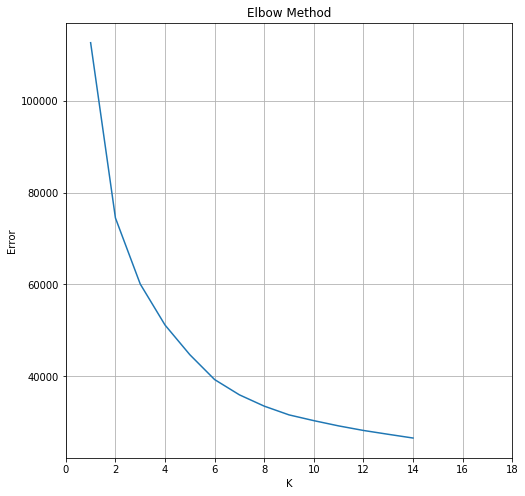

In [150]:
km = [KMeans(n_clusters=i, random_state=1986) for i in Ks]
score = [-km[i].fit(X).score(X) for i in range(len(km))]
Ks.dtype = int
plt.figure(figsize=(8,8))
plt.plot(Ks,score)
plt.xlim(0,18)
plt.grid(True)
plt.xlabel('K')
plt.ylabel('Error')
plt.title('Elbow Method')

In [26]:
audio_cols

['acousticness',
 'danceability',
 'energy',
 'instrumentalness',
 'liveness',
 'speechiness',
 'tempo',
 'valence']

In [27]:
clusters

genre  popularity  acousticness  danceability    duration_ms  \
0          A Capella    9.302521      0.829941      0.412252  204467.697479   
1        Alternative   50.213430      0.162313      0.541898  233241.364245   
2              Anime   24.258729      0.286843      0.472090  229937.067927   
3              Blues   34.742879      0.327840      0.528232  251931.826000   
4   Children's Music   36.202426      0.320112      0.598829  199663.490919   
5          Classical   29.282195      0.868843      0.305958  310339.983578   
6             Comedy   21.342630      0.793098      0.559038  235305.210102   
7            Country   46.100416      0.270172      0.577038  217237.527008   
8              Dance   57.275256      0.152888      0.638191  226264.941846   
9         Electronic   38.056095      0.119839      0.619542  269195.980164   
10              Folk   49.940209      0.463201      0.527276  235805.456608   
11           Hip-Hop   58.423131      0.176172      0.718808  219981.913179   
12             Indie   54.701561      0.331214      0.566821  224150.373991   
13              Jazz   40.824383      0.499606      0.585638  265645.269887   
14             Movie   12.174097      0.697341      0.491186  210405.351653   
15             Opera   13.335628      0.945202      0.290650  259161.092271   
16               Pop   66.590667      0.224819      0.640236  220859.160239   
17               R&B   52.308719      0.288216      0.642125  225748.130227   
18               Rap   60.533795      0.168080      0.697244  219853.858102   
19            Reggae   35.589328      0.185783      0.699271  239503.539391   
20         Reggaeton   37.742915      0.218923      0.731260  232037.139128   
21              Rock   59.619392      0.196429      0.538292  237003.226920   
22               Ska   28.612351      0.099728      0.526799  191548.603899   
23              Soul   47.027836      0.360679      0.617645  234714.359225   
24        Soundtrack   33.954800      0.717349      0.265616  192611.748808   
25             World   35.524077      0.393341      0.443293  315327.891931   

      energy  instrumentalness  liveness   loudness  speechiness     tempo  \
0   0.250313          0.007491  0.136924 -13.660387     0.042414  0.381792   
1   0.711519          0.061303  0.196985  -6.540803     0.088783  0.433624   
2   0.665356          0.280592  0.192391  -7.917802     0.065102  0.452891   
3   0.606171          0.095175  0.233125  -9.053807     0.061809  0.427051   
4   0.593204          0.087013  0.183986  -8.399591     0.097763  0.429407   
5   0.177984          0.599425  0.162810 -21.544477     0.052001  0.348021   
6   0.676094          0.000574  0.724775 -11.689321     0.853532  0.319289   
7   0.636318          0.005610  0.187216  -7.341693     0.048989  0.437764   
8   0.698067          0.035449  0.187753  -6.054241     0.083608  0.425443   
9   0.739299          0.350955  0.210006  -7.035868     0.098988  0.449206   
10  0.491733          0.084934  0.170773  -9.870282     0.045077  0.415811   
11  0.643275          0.011200  0.201146  -6.860286     0.205396  0.425420   
12  0.581002          0.085317  0.168919  -7.915142     0.066724  0.418361   
13  0.472776          0.358009  0.173355 -11.210457     0.072304  0.383037   
14  0.370703          0.125427  0.228715 -12.952094     0.109400  0.393216   
15  0.168779          0.232013  0.223264 -19.339767     0.059720  0.336075   
16  0.642208          0.016599  0.179967  -6.495423     0.107963  0.427231   
17  0.564248          0.025558  0.175350  -7.597064     0.120994  0.404636   
18  0.650520          0.009317  0.198939  -6.669916     0.188186  0.426878   
19  0.635749          0.039972  0.193076  -7.518107     0.116163  0.413052   
20  0.748836          0.003666  0.207510  -5.875960     0.127616  0.426345   
21  0.683670          0.053288  0.186981  -7.285875     0.053664  0.434072   
22  0.815585          0.056709  0.243473  -6.172705     0.089158  0.466059   
23  0.532

In [99]:
km = KMeans(n_clusters=7, n_init=10, random_state=1986)
fit_value = km.fit(X)


In [101]:
fit_value = km.predict(X)

In [103]:
len(fit_value)

232725

In [105]:
X['clusters'] = fit_value

C:\Users\md\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [106]:
X

acousticness  danceability  energy  instrumentalness  liveness  \
644         0.575000         0.616  0.5690          0.000000    0.0833   
583         0.793000         0.315  0.1870          0.000000    0.2250   
584         0.962000         0.255  0.1400          0.001050    0.1700   
585         0.733000         0.487  0.2630          0.000000    0.2330   
586         0.970000         0.303  0.1180          0.000012    0.1200   
...              ...           ...     ...               ...       ...   
217259      0.049100         0.562  0.9180          0.000080    0.1120   
217258      0.907000         0.161  0.0447          0.896000    0.0924   
217257      0.992000         0.196  0.1490          0.826000    0.1050   
217453      0.000658         0.625  0.7600          0.790000    0.6740   
211111      0.001030         0.289  0.8210          0.000013    0.0908   

        speechiness     tempo  valence  clusters  
644          0.0583  0.331854   0.7170         1  
583          0.0284  0.237648   0.1900         3  
584          0.0285  0.279314   0.1540         3  
585          0.0334  0.531182   0.5570         1  
586          0.0539  0.198603   0.1220         3  
...             ...       ...      ...       ...  
217259       0.0373  0.402684   0.4020         4  
217258       0.0435  0.475278   0.0286         5  
217257       0.0328  0.235159   0.0843         5  
217453       0.0409  0.539299   0.5020         2  
211111       0.0682  0.689550   0.4560         4  

[232725 rows x 9 columns]

In [95]:
labels = km.labels_
cluster_centers = km.cluster_centers_
labels_unique = np.unique(labels)
print(labels)
print(labels_unique)

[1 3 3 ... 5 2 4]
[0 1 2 3 4 5 6]


In [96]:
n_clusters_ = len(labels_unique)
km_clusters = pd.DataFrame(cluster_centers, columns=audio_cols)
km_clusters['genre'] = ['KM{}'.format(l) for l in labels_unique]
km_clusters['method'] = 'KMeans'


In [97]:
km_clusters

acousticness  danceability    energy  instrumentalness  liveness  \
0      0.106702      0.661606  0.757293          0.015715  0.203399   
1      0.577085      0.650856  0.498683          0.023860  0.178235   
2      0.165358      0.555551  0.650799          0.758623  0.188015   
3      0.836195      0.415132  0.240863          0.039199  0.187317   
4      0.099891      0.548697  0.685284          0.017876  0.208780   
5      0.881351      0.313462  0.171091          0.841382  0.141111   
6      0.800400      0.559831  0.670471          0.000784  0.738966   

   speechiness     tempo   valence genre  method  
0     0.103062  0.434123  0.722800   KM0  KMeans  
1     0.103189  0.406462  0.610428   KM1  KMeans  
2     0.062354  0.428389  0.427339   KM2  KMeans  
3     0.055258  0.372491  0.232043   KM3  KMeans  
4     0.098160  0.441900  0.321135   KM4  KMeans  
5     0.046198  0.345091  0.181835   KM5  KMeans  
6     0.882365  0.317531  0.409812   KM6  KMeans

In [98]:
new_cols = audio_cols+['genre']
clusters[new_cols]

acousticness  danceability    energy  instrumentalness  liveness  \
0       0.829941      0.412252  0.250313          0.007491  0.136924   
1       0.162313      0.541898  0.711519          0.061303  0.196985   
2       0.286843      0.472090  0.665356          0.280592  0.192391   
3       0.327840      0.528232  0.606171          0.095175  0.233125   
4       0.320112      0.598829  0.593204          0.087013  0.183986   
5       0.868843      0.305958  0.177984          0.599425  0.162810   
6       0.793098      0.559038  0.676094          0.000574  0.724775   
7       0.270172      0.577038  0.636318          0.005610  0.187216   
8       0.152888      0.638191  0.698067          0.035449  0.187753   
9       0.119839      0.619542  0.739299          0.350955  0.210006   
10      0.463201      0.527276  0.491733          0.084934  0.170773   
11      0.176172      0.718808  0.643275          0.011200  0.201146   
12      0.331214      0.566821  0.581002          0.085317  0.168919   
13      0.499606      0.585638  0.472776          0.358009  0.173355   
14      0.697341      0.491186  0.370703          0.125427  0.228715   
15      0.945202      0.290650  0.168779          0.232013  0.223264   
16      0.224819      0.640236  0.642208          0.016599  0.179967   
17      0.288216      0.642125  0.564248          0.025558  0.175350   
18      0.168080      0.697244  0.650520          0.009317  0.198939   
19      0.185783      0.699271  0.635749          0.039972  0.193076   
20      0.218923      0.731260  0.748836          0.003666  0.207510   
21      0.196429      0.538292  0.683670          0.053288  0.186981   
22      0.099728      0.526799  0.815585          0.056709  0.243473   
23      0.360679      0.617645  0.532506          0.062295  0.179252   
24      0.717349      0.265616  0.221110          0.783611  0.137555   
25      0.393341      0.443293  0.506453          0.233882  0.227793   

    speechiness     tempo   valence             genre  
0      0.042414  0.381792  0.328724         A Capella  
1      0.088783  0.433624  0.449590       Alternative  
2      0.065102  0.452891  0.441682             Anime  
3      0.061809  0.427051  0.579425             Blues  
4      0.097763  0.429407  0.532251  Children's Music  
5      0.052001  0.348021  0.214463         Classical  
6      0.853532  0.319289  0.412764            Comedy  
7      0.048989  0.437764  0.535160           Country  
8      0.083608  0.425443  0.517754             Dance  
9      0.098988  0.449206  0.388129        Electronic  
10     0.045077  0.415811  0.440237              Folk  
11     0.205396  0.425420  0.473381           Hip-Hop  
12     0.066724  0.418361  0.428665             Indie  
13     0.072304  0.383037  0.508961              Jazz  
14     0.109400  0.393216  0.447808             Movie  
15     0.059720  0.336075  0.189864             Opera  
16     0.107963  0.427231  0.481371               Pop  
17     0.120994  0.404636  0.450346               R&B  
18     0.188186  0.426878  0.455918               Rap  
19     0.116163  0.413052  0.679665            Reggae  
20     0.127616  0.426345  0.659439         Reggaeton  
21     0.053664  0.434072  0.517113              Rock  
22     0.089158  0.466059  0.653472               Ska  
23     0.082531  0.399689  0.480562              Soul  
24     0.043852  0.346806  0.118483        Soundtrack  
25     0.045766  0.420857  0.295657             World

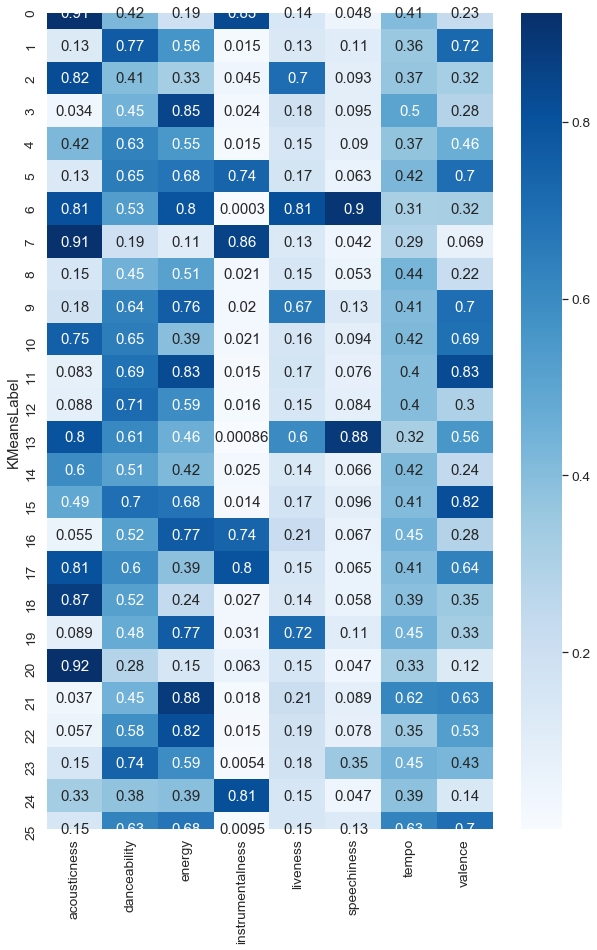

In [32]:
sns.set(font_scale=1.25,rc={'figure.figsize':(10,15)})
sns.heatmap(
    data=km_clusters.loc[km_clusters.method=='KMeans', audio_cols],
    cmap='Blues',
    annot=True
)
plt.ylabel("KMeansLabel")
plt.savefig('heatmap_all.png')


### Evaluating K-Means Visually


In [112]:
#descriptive_labels = ["Slow & Somber Acoustics", "Happy & Danceable Instrumentals", "Sad Instrumentals", 
#                     "Upbeat Songs With Cheerful Vocals", "Fast & Danceable Instrumentals", "Fast, Upbeat & Cheerful Songs",
#                     "Slow Dance", "Happy & Slow", "Happy & Upbeat Instrumentals","KM9","KM10","KM11","KM12","KM13","KM14","KM15","KM16","KM17","KM18","KM19","KM20","KM21","KM22","KM23","KM24","KM25","a","a"]

descriptive_labels = ['KM0','KM1','KM2','KM3','KM4','KM5','KM6']
unique_labels = np.unique(labels)
translated_labels = dict(zip(unique_labels, descriptive_labels))
print(unique_labels)
print(translated_labels)
df['KMeansLabel'] = list(map(lambda x:translated_labels[x], labels))
print(df['KMeansLabel'])

[0 1 2 3 4 5 6]
{0: 'KM0', 1: 'KM1', 2: 'KM2', 3: 'KM3', 4: 'KM4', 5: 'KM5', 6: 'KM6'}
644       KM1
583       KM3
584       KM3
585       KM1
586       KM3
         ... 
217259    KM4
217258    KM5
217257    KM5
217453    KM2
211111    KM4
Name: KMeansLabel, Length: 232725, dtype: object


In [378]:
X_new.shape


(232725, 2)

In [377]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_new = pca.fit_transform(X)
x,y = zip(*X_new)
df['x'] = x
df['y'] = y

components = pca.components_
explained_variance = pca.explained_variance_
explained_variance_ratio = pca.explained_variance_ratio_
singular_values = pca.singular_values_

In [58]:

audio_components = dict(list(zip(audio_cols, zip(*np.round(components,2)))))
audio_components

{'acousticness': (0.67, 0.5),
 'danceability': (-0.22, 0.14),
 'energy': (-0.48, -0.06),
 'instrumentalness': (0.4, -0.66),
 'liveness': (-0.03, 0.32),
 'speechiness': (-0.01, 0.37),
 'tempo': (-0.08, -0.06),
 'valence': (-0.33, 0.19)}

In [59]:
components

array([[ 0.66727874, -0.22046819, -0.48026757,  0.39676508, -0.02666727,
        -0.01329518, -0.08084092, -0.33261124],
       [ 0.50432922,  0.13872152, -0.06181905, -0.66366676,  0.32099069,
         0.37174018, -0.06310912,  0.19215791]])

In [60]:
singular_values


array([225.69269167, 139.29910152])

Text(0.5, 1, 'Clustering by Genre, Reduced Dimension')

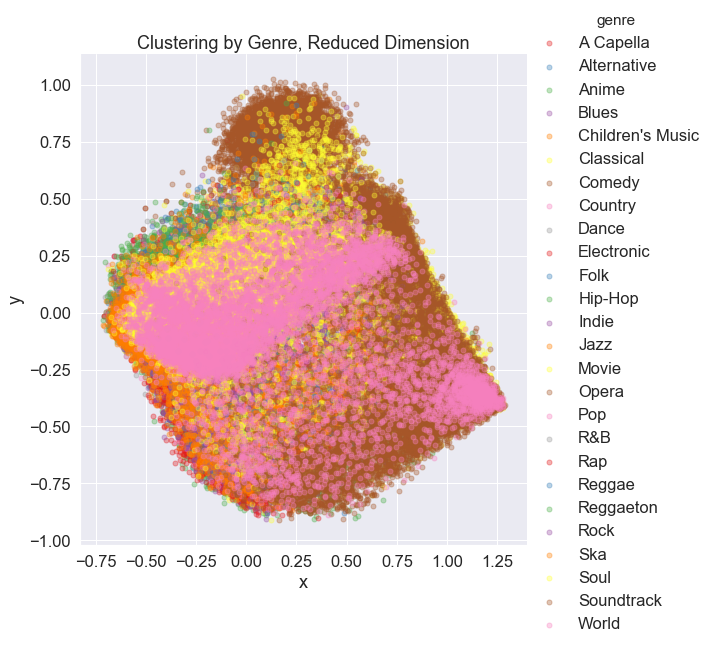

In [146]:
sns.set(font_scale=1.5)
sns.lmplot(data=df, x='x', y='y', hue='genre', fit_reg=False, legend=True, size=8, palette='Set1',
           scatter_kws={'alpha':0.35, 's':25})
# plt.legend(loc='lower right')
# plt.ylim(-0.7,1.8)
# plt.xlim(-0.7,1.8)
plt.savefig('pca_scatter_genres.png')
plt.title("Clustering by Genre, Reduced Dimension")

In [367]:
df.head()

genre            artist_name                         track_name  \
644  A Capella          Hyannis Sound       Absolutely (Story of a Girl)   
583  A Capella                   Glad          O Sacred Head Now Wounded   
584  A Capella  The Singers Unlimited    Killing Me Softly with His Song   
585  A Capella                   Glad  All Hail the Power of Jesus' Name   
586  A Capella  The Singers Unlimited                     Both Sides Now   

                   track_id  popularity  acousticness  danceability  \
644  4cDYqCte9iuEweE5fCwtaP           1         0.575         0.616   
583  4T0MhF3l1r8GGjVu9D68LG          10         0.793         0.315   
584  5QP9P48x0NmnLhCTRg3CYU          14         0.962         0.255   
585  1uooaC1KFcxzYbiHpbP0hi          10         0.733         0.487   
586  3zFfH4tfGuVWbjNdNUX9QI          13         0.970         0.303   

     duration_ms  energy  instrumentalness  ... speechiness     tempo  \
644       164280   0.569          0.000000  ...      0.0583  0.331854   
583       167760   0.187          0.000000  ...      0.0284  0.237648   
584       260067   0.140          0.001050  ...      0.0285  0.279314   
585       177640   0.263          0.000000  ...      0.0334  0.531182   
586       182002   0.118          0.000012  ...      0.0539  0.198603   

     time_signature valence  KMeansLabel         x         y         z  \
644             4/4   0.717          KM1 -0.010190  0.201047 -0.312842   
583             4/4   0.190          KM3  0.564620  0.231898  0.078087   
584             4/4   0.154          KM3  0.723679  0.283851  0.052733   
585             3/4   0.557          KM1  0.304085  0.277224 -0.205281   
586             4/4   0.122          KM3  0.746753  0.288930  0.038331   

        x_lda     y_lda  
644 -0.010190  0.201047  
583  0.564620  0.231898  
584  0.723679  0.283851  
585  0.304085  0.277224  
586  0.746753  0.288930  

[5 rows x 24 columns]

C:\Users\md\Anaconda3\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


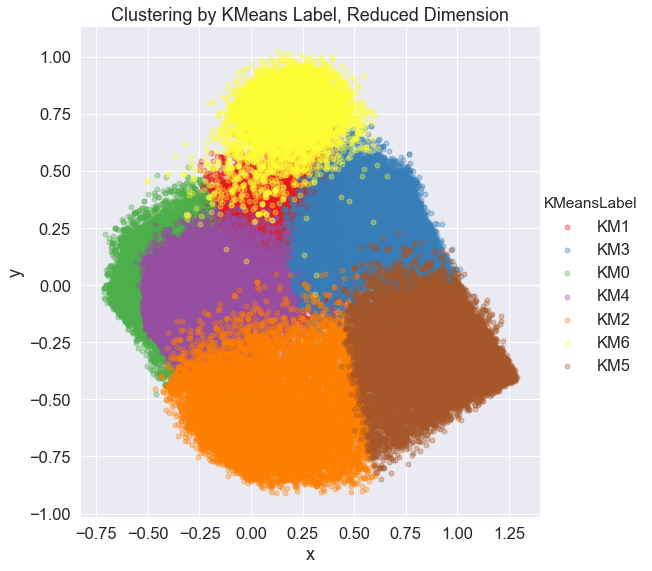

In [379]:
sns.set(font_scale=1.5)

sns.lmplot(data=df, x='x', y='y', hue='KMeansLabel', fit_reg=False, legend=True, size=8, palette='Set1',
           scatter_kws={'alpha':0.35, 's':25})
plt.title("Clustering by KMeans Label, Reduced Dimension")

plt.savefig('pca_scatter_KM.png')

In [47]:
df.head()

genre            artist_name                         track_name  \
644  A Capella          Hyannis Sound       Absolutely (Story of a Girl)   
583  A Capella                   Glad          O Sacred Head Now Wounded   
584  A Capella  The Singers Unlimited    Killing Me Softly with His Song   
585  A Capella                   Glad  All Hail the Power of Jesus' Name   
586  A Capella  The Singers Unlimited                     Both Sides Now   

                   track_id  popularity  acousticness  danceability  \
644  4cDYqCte9iuEweE5fCwtaP           1         0.575         0.616   
583  4T0MhF3l1r8GGjVu9D68LG          10         0.793         0.315   
584  5QP9P48x0NmnLhCTRg3CYU          14         0.962         0.255   
585  1uooaC1KFcxzYbiHpbP0hi          10         0.733         0.487   
586  3zFfH4tfGuVWbjNdNUX9QI          13         0.970         0.303   

     duration_ms  energy  instrumentalness  ... liveness  loudness   mode  \
644       164280   0.569          0.000000  ...   0.0833    -6.090  Major   
583       167760   0.187          0.000000  ...   0.2250    -9.709  Minor   
584       260067   0.140          0.001050  ...   0.1700   -14.632  Major   
585       177640   0.263          0.000000  ...   0.2330    -9.489  Major   
586       182002   0.118          0.000012  ...   0.1200   -15.882  Major   

    speechiness     tempo  time_signature valence  KMeansLabel         x  \
644      0.0583  0.331854             4/4   0.717         KM15 -0.010190   
583      0.0284  0.237648             4/4   0.190         KM20  0.564620   
584      0.0285  0.279314             4/4   0.154         KM20  0.723679   
585      0.0334  0.531182             3/4   0.557         KM10  0.304085   
586      0.0539  0.198603             4/4   0.122         KM20  0.746753   

            y  
644  0.201047  
583  0.231898  
584  0.283851  
585  0.277224  
586  0.288930  

[5 rows x 21 columns]

#### LDA 

In [68]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
y_train = df['genre']
lda = LDA(n_components=2)
X_lda = lda.fit_transform(X,y_train)
x_lda,y_lda = zip(*X_new)
df['x_lda'] = x_lda
df['y_lda'] = y_lda

C:\Users\md\Anaconda3\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1, 'Clustering by Genre, Reduced Dimension by LDA')

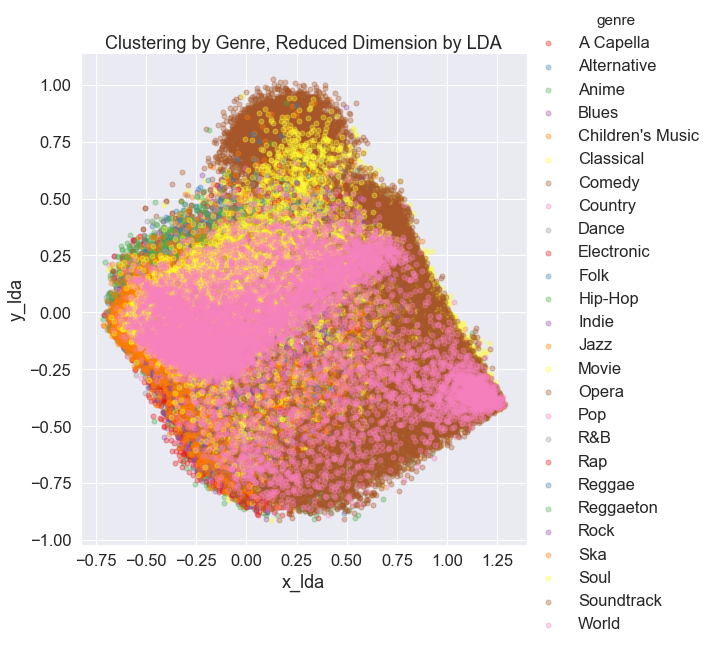

In [69]:
sns.set(font_scale=1.5)
sns.lmplot(data=df, x='x_lda', y='y_lda', hue='genre', fit_reg=False, legend=True, size=8, palette='Set1',
           scatter_kws={'alpha':0.35, 's':25})
# plt.legend(loc='lower right')
# plt.ylim(-0.7,1.8)
# plt.xlim(-0.7,1.8)
plt.savefig('lda_scatter_genres.png')
plt.title("Clustering by Genre, Reduced Dimension by LDA")

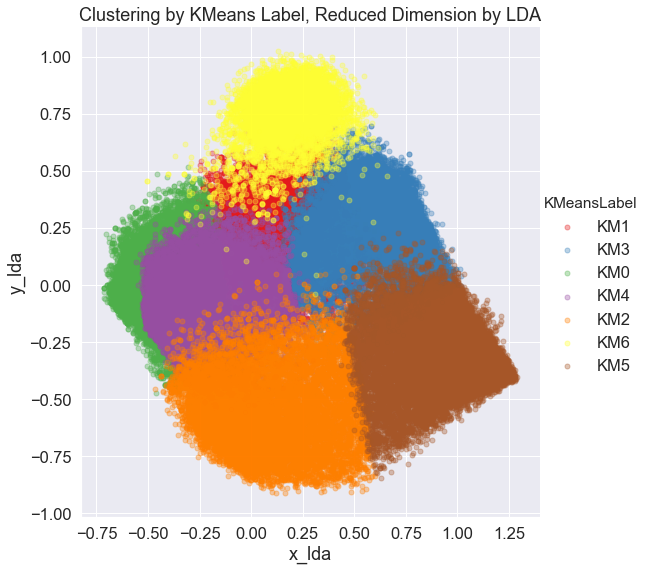

In [380]:
sns.set(font_scale=1.5)

sns.lmplot(data=df, x='x_lda', y='y_lda', hue='KMeansLabel', fit_reg=False, legend=True, size=8, palette='Set1',
           scatter_kws={'alpha':0.35, 's':25})
plt.title("Clustering by KMeans Label, Reduced Dimension by LDA")

plt.savefig('lda_scatter_KM.png')

In [71]:
audio_cols


['acousticness',
 'danceability',
 'energy',
 'instrumentalness',
 'liveness',
 'speechiness',
 'tempo',
 'valence']

In [72]:
km_clusters.head()

acousticness  danceability    energy  instrumentalness  liveness  \
0      0.914347      0.422309  0.191988          0.830497  0.144599   
1      0.126121      0.769390  0.564433          0.015001  0.134507   
2      0.823293      0.406213  0.325972          0.044672  0.703414   
3      0.033863      0.445740  0.850472          0.024083  0.183787   
4      0.418611      0.631548  0.554914          0.014876  0.154904   

   speechiness     tempo   valence genre  method  
0     0.047628  0.410746  0.228766   KM0  KMeans  
1     0.106808  0.355023  0.724343   KM1  KMeans  
2     0.092600  0.366624  0.322711   KM2  KMeans  
3     0.095052  0.501703  0.281440   KM3  KMeans  
4     0.089720  0.373209  0.462403   KM4  KMeans

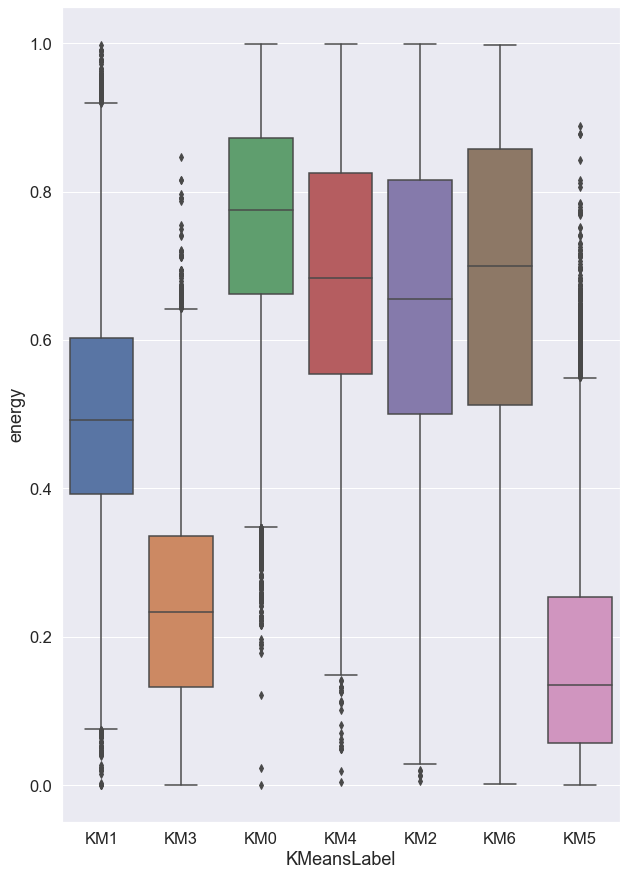

In [118]:
sns.boxplot(x=df['KMeansLabel'],y=X['energy'])

In [115]:
df[df['KMeansLabel']=='KM5']['genre'].value_counts(normalize= True)

Soundtrack          0.313404
Classical           0.265783
Opera               0.091940
Anime               0.067304
World               0.064784
Jazz                0.061873
Movie               0.045014
Children's Music    0.026548
Folk                0.014816
Electronic          0.012253
Indie               0.009559
Soul                0.007517
Blues               0.006213
Rock                0.003780
Alternative         0.002390
R&B                 0.002216
Pop                 0.001912
Dance               0.000912
Rap                 0.000608
Reggae              0.000434
Ska                 0.000348
Country             0.000304
Hip-Hop             0.000087
Name: genre, dtype: float64

In [116]:
df[df['KMeansLabel']=='KM0']['genre'].value_counts(normalize= True)

Reggaeton           0.097368
Reggae              0.089483
Ska                 0.084809
Dance               0.060487
Children's Music    0.059247
Hip-Hop             0.056529
Rock                0.055957
Country             0.053302
Pop                 0.052348
Rap                 0.051998
Blues               0.045433
Alternative         0.042508
Anime               0.042317
R&B                 0.038168
Soul                0.035529
Indie               0.034766
Electronic          0.028137
Folk                0.026913
Jazz                0.019919
Movie               0.011144
World               0.010651
Comedy              0.001621
Classical           0.001145
Soundtrack          0.000191
A Capella           0.000032
Name: genre, dtype: float64

In [119]:
df[df['KMeansLabel']=='KM6']['genre'].value_counts(normalize= True)

Comedy              0.916878
Movie               0.035335
Children's Music    0.015389
Hip-Hop             0.004354
Rap                 0.003240
Opera               0.003139
Blues               0.002936
Jazz                0.002734
Ska                 0.002126
R&B                 0.002025
Classical           0.001620
Alternative         0.001620
Soul                0.001519
Reggae              0.001114
World               0.001012
Reggaeton           0.001012
Folk                0.000810
Country             0.000709
Pop                 0.000607
Indie               0.000607
Electronic          0.000506
Soundtrack          0.000304
Rock                0.000202
Dance               0.000202
Name: genre, dtype: float64

In [120]:
df[df['KMeansLabel']=='KM2']['genre'].value_counts(normalize= True)

Electronic          0.233340
Jazz                0.161606
Soundtrack          0.096665
Anime               0.087630
World               0.059846
Children's Music    0.045853
Blues               0.045581
Indie               0.040554
Alternative         0.033625
Ska                 0.031723
Folk                0.028327
Rock                0.025610
Soul                0.024387
Reggae              0.022145
Dance               0.019020
Classical           0.013178
R&B                 0.010325
Pop                 0.005842
Hip-Hop             0.005502
Movie               0.004144
Rap                 0.002921
Country             0.001223
Reggaeton           0.000815
Opera               0.000136
Name: genre, dtype: float64

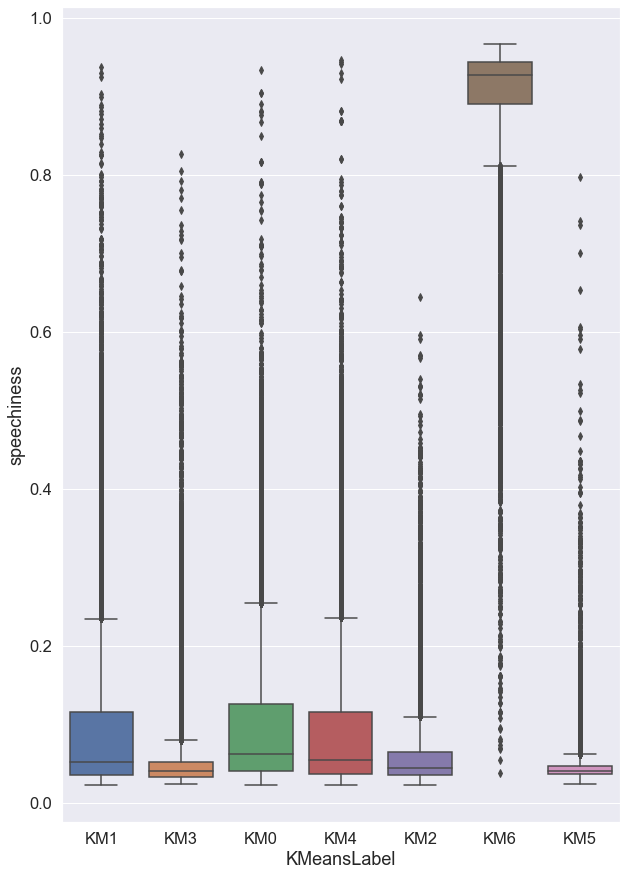

In [121]:
sns.boxplot(x=df['KMeansLabel'],y=X['speechiness'])

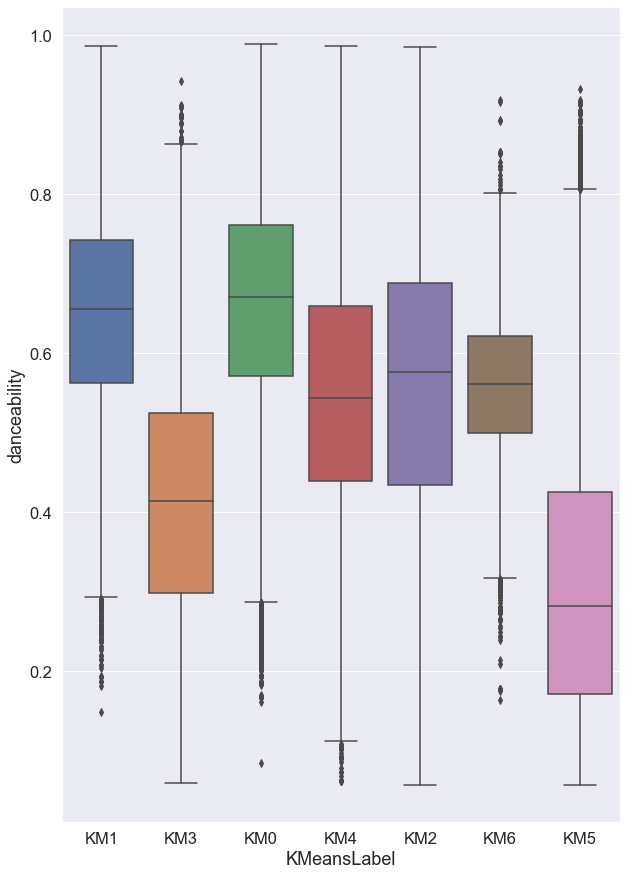

In [124]:
sns.boxplot(x=df['KMeansLabel'],y=X['danceability'])


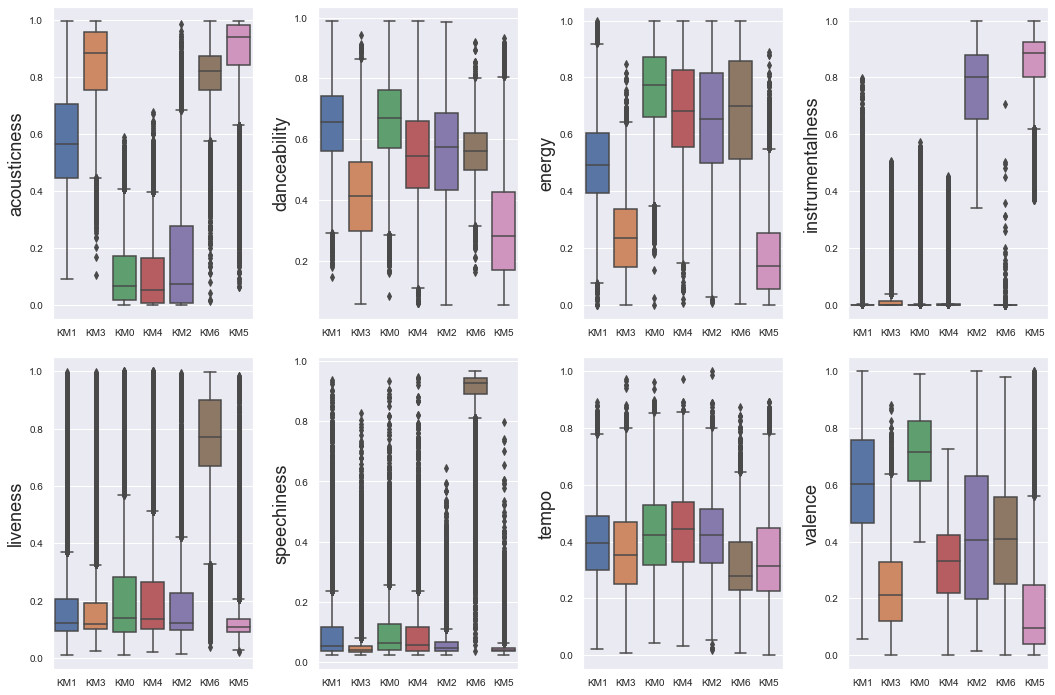

In [140]:
# Sometimes you can analyze an ordinal variable as numerical one
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 10))
for idx, feat in enumerate(audio_cols): 
    ax = axes[int(idx / 4), idx % 4] 
    sns.boxplot(x='KMeansLabel', y=feat, data=df, ax=ax) 
    ax.set_xlabel('',fontsize=0.2) 
    ax.set_ylabel(feat) 
    ax.tick_params(labelsize=10)

fig.tight_layout();

<b>Instrumentalness:</b> This value represents the amount of vocals in the song. The closer it is to 1.0, the more instrumental the song is. <br />
<b>Acousticness:</b> This value describes how acoustic a song is. A score of 1.0 means the song is most likely to be an acoustic one. <br />
<b>Liveness:</b> This value describes the probability that the song was recorded with a live audience. According to the official documentation “a value above 0.8 provides strong likelihood that the track is live”. <br />
<b>Speechiness:</b> “Speechiness detects the presence of spoken words in a track”. If the speechiness of a song is above 0.66, it is probably made of spoken words, a score between 0.33 and 0.66 is a song that may contain both music and words, and a score below 0.33 means the song does not have any speech. <br />
<b>Energy:</b> “(energy) represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy”. <br />
<b>Danceability:</b> “Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable”. <br />
<b>Valence:</b> “A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry)”. <br />

### Cluster 5 analysis - Gloomy Acoustic music

In [142]:
df[df['KMeansLabel']=='KM5']['genre'].value_counts(normalize= True)

Soundtrack          0.313404
Classical           0.265783
Opera               0.091940
Anime               0.067304
World               0.064784
Jazz                0.061873
Movie               0.045014
Children's Music    0.026548
Folk                0.014816
Electronic          0.012253
Indie               0.009559
Soul                0.007517
Blues               0.006213
Rock                0.003780
Alternative         0.002390
R&B                 0.002216
Pop                 0.001912
Dance               0.000912
Rap                 0.000608
Reggae              0.000434
Ska                 0.000348
Country             0.000304
Hip-Hop             0.000087
Name: genre, dtype: float64

So, in the KM5 cluster, we can observe that 57% of the songs are in soundtrack and Classical genre category.
And we can observe that, the values of instrumentalness and acousticness are very high and energy,danceability, speechiness and liveness are significantly low.
Acoustic music is music that solely or primarily uses instruments that produce sound through acoustic means, as opposed to electric or electronic means.
So the cluster having high values of acousticness and instrumentalness makes sense.
This cluster can be named "Gloomy Acoustic"
Also, soundtrack is background music for a film , TV show or theatre production.

### Cluster 6 Analysis - Fun and Lively Music

In [144]:
df[df['KMeansLabel']=='KM6']['genre'].value_counts(normalize= True)

Comedy              0.916878
Movie               0.035335
Children's Music    0.015389
Hip-Hop             0.004354
Rap                 0.003240
Opera               0.003139
Blues               0.002936
Jazz                0.002734
Ska                 0.002126
R&B                 0.002025
Classical           0.001620
Alternative         0.001620
Soul                0.001519
Reggae              0.001114
World               0.001012
Reggaeton           0.001012
Folk                0.000810
Country             0.000709
Pop                 0.000607
Indie               0.000607
Electronic          0.000506
Soundtrack          0.000304
Rock                0.000202
Dance               0.000202
Name: genre, dtype: float64

In cluster 5 we can observe that about 91% of the songs in the database comes under comedy genre.
From observing the features, speechiness, liveness, acoustciness and energy are very high.
Instrumentalness, tempo, and valence are very low for this cluster.

As we can say that comedy genre usually involves high amount of usage of words, also has high energy, this cluster having high values for both the features makes sense.
So we can name this cluster as "Fun and Lively" group.



### Cluster 2 Analysis - Energetic Instrumentals

In [147]:
df[df['KMeansLabel']=='KM2']['genre'].value_counts(normalize= True)

Electronic          0.233340
Jazz                0.161606
Soundtrack          0.096665
Anime               0.087630
World               0.059846
Children's Music    0.045853
Blues               0.045581
Indie               0.040554
Alternative         0.033625
Ska                 0.031723
Folk                0.028327
Rock                0.025610
Soul                0.024387
Reggae              0.022145
Dance               0.019020
Classical           0.013178
R&B                 0.010325
Pop                 0.005842
Hip-Hop             0.005502
Movie               0.004144
Rap                 0.002921
Country             0.001223
Reggaeton           0.000815
Opera               0.000136
Name: genre, dtype: float64

This cluster contains songs of "Electronic and Jazz" of about 40% from all the songs.
By observing the above boxplots, this cluster has high values of instrumentalness and energy.
It also has significantly low values from acousticness, liveness and speechness. 

So we can name this group as "Energtic Instrumentals"


### Cluster 4 Analysis - Upbeat Music

In [153]:
df[df['KMeansLabel']=='KM4']['genre'].value_counts(normalize= True)

Children's Music    0.076797
Rap                 0.073560
Alternative         0.073155
Hip-Hop             0.068784
Pop                 0.062034
World               0.061532
Dance               0.057339
Rock                0.056627
Electronic          0.056287
R&B                 0.055947
Indie               0.052321
Country             0.044405
Soul                0.041199
Anime               0.039289
Ska                 0.038463
Folk                0.033672
Blues               0.033170
Reggaeton           0.023522
Reggae              0.021466
Jazz                0.011445
Movie               0.008677
Classical           0.007398
Soundtrack          0.002007
Comedy              0.000907
Name: genre, dtype: float64

This cluster has high values of energy, danceability. Mid level tempo.
Also very low values of instrumentalness, acousticness, liveness and speechiness.


### Cluster 0 Analysis

In [150]:
 df[df['KMeansLabel']=='KM0']['genre'].value_counts(normalize= True)

Reggaeton           0.097368
Reggae              0.089483
Ska                 0.084809
Dance               0.060487
Children's Music    0.059247
Hip-Hop             0.056529
Rock                0.055957
Country             0.053302
Pop                 0.052348
Rap                 0.051998
Blues               0.045433
Alternative         0.042508
Anime               0.042317
R&B                 0.038168
Soul                0.035529
Indie               0.034766
Electronic          0.028137
Folk                0.026913
Jazz                0.019919
Movie               0.011144
World               0.010651
Comedy              0.001621
Classical           0.001145
Soundtrack          0.000191
A Capella           0.000032
Name: genre, dtype: float64

This cluster has high values of energy, danceability and valence. Mid level tempo.
Also very low values of instrumentalness, acousticness, liveness and speechiness.

Now by observing the genre percentges in this group, each of the Reggaeton, Reggae, Ska,Dance, Childrens Music, Hip Hop contribute to almost 45% of the songs.
If we see Reggaeton, reggae and Hip Hop they are all child genre categories of same parent genres. So our cluster having major contribution from these genres makes sense.<br>
Reggaeton: Vocals include rapping and singing, typically in Spanish.

reggae is based on ska, an earlier form of Jamaican popular music, and employs a heavy four-beat rhythm driven by drums, bass guitar, electric guitar, and the “scraper,” a corrugated stick that is rubbed by a plain stick.

If we observe both cluster 0 and cluster 4, both of them have same kind of features except for valence. Cluster 0 has high valence whereas cluster 0 has low valence. Valence means positivity. </br>
So we can categorize cluster 4 as <b>Upbeat music</b> and cluster 0 as <b>Upbeat positive music</b>.

### Cluster 3 Analysis - Happy Acoustic

In [156]:
 df[df['KMeansLabel']=='KM3']['genre'].value_counts(normalize= True)

Opera               0.209852
Movie               0.100126
Folk                0.097856
Classical           0.078306
Indie               0.062596
Jazz                0.054741
World               0.054008
Children's Music    0.046676
Soul                0.046362
Blues               0.033620
R&B                 0.033585
Country             0.031839
Soundtrack          0.026812
Pop                 0.024403
Rock                0.022448
Anime               0.020772
Alternative         0.020283
Dance               0.006878
Electronic          0.005237
Comedy              0.004957
Rap                 0.004888
Reggae              0.004434
Hip-Hop             0.004050
A Capella           0.003072
Ska                 0.001676
Reggaeton           0.000524
Name: genre, dtype: float64

This cluster has high value of acousticness. Midlevel danceability and tempo. </br>
Also this cluster contains 20% of the songs from Opera which makes sense because opera usually involves acoustic music and doesn't have much instrumentalness or speechiness.</br>
Also, Folk classical Movie opera contribute to almost 50% of the songs in this category. </br>
So this group can be named <b>"Happy acoustic"</b> as opposed to cluster 5 which has high acoustic but very low danceability and valence.</br>


"Acoustic music is music that solely or primarily uses instruments that produce sound through acoustic means, as opposed to electric or electronic means; typically the phrase refers to that made by acoustic string instruments."

### Cluster 1 Analysis -Positive soul,dancing Jazz Blues

In [157]:
 df[df['KMeansLabel']=='KM1']['genre'].value_counts(normalize= True)

Children's Music    0.110416
Soul                0.076567
Blues               0.072667
Movie               0.070936
Jazz                0.065526
Folk                0.061562
R&B                 0.061342
Country             0.051087
Indie               0.047438
Pop                 0.044858
Reggae              0.042216
Reggaeton           0.041272
Hip-Hop             0.039259
Rap                 0.037371
Rock                0.036019
Alternative         0.029035
Dance               0.026865
World               0.021894
Ska                 0.019472
Anime               0.012992
Comedy              0.010224
Electronic          0.008116
Classical           0.004939
Opera               0.003775
Soundtrack          0.003240
A Capella           0.000912
Name: genre, dtype: float64

This cluster contains valence,danceability and acousticness and midlevel energy and tempo.
It has low levels of instrumentalness, liveness and speechiness.

As we can see that 11% of the songs in this cluster has childrens music, having high values of valence(positivity) makes sense.
Soul, blues and Jazz are kind of overlapped in general music in the world. They are almost similar, have similar origins with slight differences.They are all originated from african american communities.

I will just name this category - "Positive soul,dancing Jazz Blues"

### VARIOUS CLUSTER ALGORITHMS ON MINI DATA

In [347]:
df.head()

genre            artist_name                         track_name  \
644  A Capella          Hyannis Sound       Absolutely (Story of a Girl)   
583  A Capella                   Glad          O Sacred Head Now Wounded   
584  A Capella  The Singers Unlimited    Killing Me Softly with His Song   
585  A Capella                   Glad  All Hail the Power of Jesus' Name   
586  A Capella  The Singers Unlimited                     Both Sides Now   

                   track_id  popularity  acousticness  danceability  \
644  4cDYqCte9iuEweE5fCwtaP           1         0.575         0.616   
583  4T0MhF3l1r8GGjVu9D68LG          10         0.793         0.315   
584  5QP9P48x0NmnLhCTRg3CYU          14         0.962         0.255   
585  1uooaC1KFcxzYbiHpbP0hi          10         0.733         0.487   
586  3zFfH4tfGuVWbjNdNUX9QI          13         0.970         0.303   

     duration_ms  energy  instrumentalness  ... speechiness     tempo  \
644       164280   0.569          0.000000  ...      0.0583  0.331854   
583       167760   0.187          0.000000  ...      0.0284  0.237648   
584       260067   0.140          0.001050  ...      0.0285  0.279314   
585       177640   0.263          0.000000  ...      0.0334  0.531182   
586       182002   0.118          0.000012  ...      0.0539  0.198603   

     time_signature valence  KMeansLabel         x         y         z  \
644             4/4   0.717          KM1 -0.010190  0.201047 -0.312842   
583             4/4   0.190          KM3  0.564620  0.231898  0.078087   
584             4/4   0.154          KM3  0.723679  0.283851  0.052733   
585             3/4   0.557          KM1  0.304085  0.277224 -0.205281   
586             4/4   0.122          KM3  0.746753  0.288930  0.038331   

        x_lda     y_lda  
644 -0.010190  0.201047  
583  0.564620  0.231898  
584  0.723679  0.283851  
585  0.304085  0.277224  
586  0.746753  0.288930  

[5 rows x 24 columns]

   Since agglomerative clustering cannot work on large database, I had to take a sample of  around 46,000 to run this algorithm. Original dataframe has around 200,000 rows.
   

In [431]:
audio_cols_genre = audio_cols+['genre']
X_heir = df[audio_cols_genre]


#X_heir = X.drop('clusters',1)
print(X_heir.head())


     acousticness  danceability  energy  instrumentalness  liveness  \
644         0.575         0.616   0.569          0.000000    0.0833   
583         0.793         0.315   0.187          0.000000    0.2250   
584         0.962         0.255   0.140          0.001050    0.1700   
585         0.733         0.487   0.263          0.000000    0.2330   
586         0.970         0.303   0.118          0.000012    0.1200   

     speechiness     tempo  valence      genre  
644       0.0583  0.331854    0.717  A Capella  
583       0.0284  0.237648    0.190  A Capella  
584       0.0285  0.279314    0.154  A Capella  
585       0.0334  0.531182    0.557  A Capella  
586       0.0539  0.198603    0.122  A Capella  


In [432]:
X_heir['genre'].value_counts()

Children's Music    14756
Comedy               9681
Soundtrack           9646
Indie                9543
Jazz                 9441
Pop                  9386
Electronic           9377
Folk                 9299
Hip-Hop              9295
Rock                 9272
Alternative          9263
Classical            9256
Rap                  9232
World                9096
Soul                 9089
Blues                9023
R&B                  8992
Anime                8936
Reggaeton            8927
Ska                  8874
Reggae               8771
Dance                8701
Country              8664
Opera                8280
Movie                7806
A Capella             119
Name: genre, dtype: int64

In [381]:
X_heir.shape

(232725, 9)

In [440]:
msk = np.random.rand(len(X_heir)) < 0.9
train = X_heir[msk]
test = X_heir[~msk]
df_spectral = test
df_heir = test
print(train.shape)
print(test.shape)

(209762, 9)
(22963, 9)


In [434]:
test['genre'].value_counts()

Children's Music    2919
Jazz                1928
Soul                1903
Comedy              1901
Indie               1900
Rap                 1880
Electronic          1864
Soundtrack          1859
Alternative         1855
Hip-Hop             1853
World               1833
Blues               1827
Reggaeton           1826
Rock                1823
Classical           1822
Anime               1821
Pop                 1815
Folk                1800
Dance               1794
R&B                 1777
Ska                 1766
Reggae              1734
Country             1687
Opera               1608
Movie               1559
A Capella             19
Name: genre, dtype: int64

In [409]:
#test = test.drop('genre',axis=1)


In [410]:
test.head()

acousticness  danceability  energy  instrumentalness  liveness  \
644         0.575         0.616   0.569          0.000000    0.0833   
583         0.793         0.315   0.187          0.000000    0.2250   
585         0.733         0.487   0.263          0.000000    0.2330   
586         0.970         0.303   0.118          0.000012    0.1200   
587         0.928         0.301   0.124          0.000000    0.1180   

     speechiness     tempo  valence      genre  
644       0.0583  0.331854    0.717  A Capella  
583       0.0284  0.237648    0.190  A Capella  
585       0.0334  0.531182    0.557  A Capella  
586       0.0539  0.198603    0.122  A Capella  
587       0.0290  0.241003    0.109  A Capella

## Elbow method

In [411]:

Ks = np.arange(1, 15)
Ks

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

Text(0.5, 1.0, 'Elbow Method')

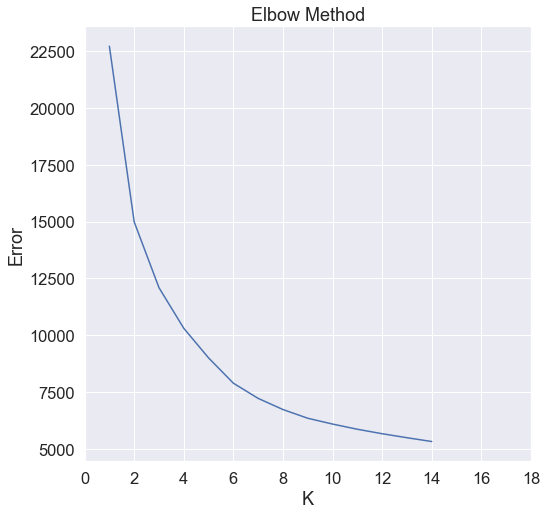

In [362]:

km = [KMeans(n_clusters=i, random_state=1986) for i in Ks]
score = [-km[i].fit(test).score(test) for i in range(len(km))]
Ks.dtype = int
plt.figure(figsize=(8,8))
plt.plot(Ks,score)
plt.xlim(0,18)
plt.grid(True)
plt.xlabel('K')
plt.ylabel('Error')
plt.title('Elbow Method')

## K-MEANS CLUSTERING

In [441]:
km = KMeans(n_clusters=3, n_init=10, random_state=1986)
fit_value = km.fit(test[['acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'speechiness', 'tempo', 'valence']])
fit_value = km.predict(test[['acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'speechiness', 'tempo', 'valence']])
#df_kmeans= test.copy()
test["genres_kmeans"]= fit_value
print(test.head())

     acousticness  danceability  energy  instrumentalness  liveness  \
592         0.771         0.510  0.3260           0.00000    0.1200   
558         0.668         0.747  0.5050           0.00000    0.1010   
561         0.360         0.654  0.4270           0.00000    0.1500   
569         0.822         0.381  0.2640           0.00000    0.0978   
578         0.971         0.291  0.0979           0.00961    0.1510   

     speechiness     tempo  valence      genre  genres_kmeans  
592       0.0285  0.527108    0.418  A Capella              2  
558       0.0746  0.431942    0.716  A Capella              2  
561       0.0379  0.447060    0.811  A Capella              0  
569       0.0350  0.433080    0.439  A Capella              2  
578       0.0302  0.378917    0.113  A Capella              2  


C:\Users\md\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


### PCA for K-Means


In [436]:
test[['acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'speechiness', 'tempo', 'valence']]

acousticness  danceability  energy  instrumentalness  liveness  \
589          0.78400         0.323  0.0872          0.000000    0.1190   
606          0.96700         0.176  0.0545          0.003650    0.1090   
562          0.83000         0.628  0.2990          0.000000    0.3100   
567          0.86100         0.185  0.3940          0.000005    0.0949   
569          0.82200         0.381  0.2640          0.000000    0.0978   
...              ...           ...     ...               ...       ...   
217268       0.05130         0.765  0.8870          0.883000    0.4510   
217266       0.00277         0.329  0.9800          0.000002    0.5330   
217261       0.90500         0.495  0.1180          0.000008    0.1340   
217259       0.04910         0.562  0.9180          0.000080    0.1120   
217258       0.90700         0.161  0.0447          0.896000    0.0924   

        speechiness     tempo  valence  
589          0.0323  0.376899   0.1440  
606          0.0345  0.227843   0.0610  
562          0.0473  0.496495   0.5570  
567          0.0324  0.073300   0.1910  
569          0.0350  0.433080   0.4390  
...             ...       ...      ...  
217268       0.0459  0.403060   0.6400  
217266       0.0770  0.534838   0.1640  
217261       0.0340  0.361522   0.2280  
217259       0.0373  0.402684   0.4020  
217258       0.0435  0.475278   0.0286  

[46373 rows x 8 columns]

In [442]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_new = pca.fit_transform(test[['acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'speechiness', 'tempo', 'valence']])
x_kmeans,y_kmeans = zip(*X_new)
test['x_kmeans'] = x_kmeans
test['y_kmeans'] = y_kmeans

components = pca.components_

explained_variance = pca.explained_variance_
explained_variance_ratio = pca.explained_variance_ratio_
singular_values = pca.singular_values_

C:\Users\md\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\md\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [443]:
test.head()

acousticness  danceability  energy  instrumentalness  liveness  \
592         0.771         0.510  0.3260           0.00000    0.1200   
558         0.668         0.747  0.5050           0.00000    0.1010   
561         0.360         0.654  0.4270           0.00000    0.1500   
569         0.822         0.381  0.2640           0.00000    0.0978   
578         0.971         0.291  0.0979           0.00961    0.1510   

     speechiness     tempo  valence      genre  genres_kmeans  x_kmeans  \
592       0.0285  0.527108    0.418  A Capella              2  0.338681   
558       0.0746  0.431942    0.716  A Capella              2  0.039168   
561       0.0379  0.447060    0.811  A Capella              0 -0.141609   
569       0.0350  0.433080    0.439  A Capella              2  0.431857   
578       0.0302  0.378917    0.113  A Capella              2  0.746541   

     y_kmeans  
592  0.244163  
558  0.286526  
561  0.141333  
569  0.261508  
578  0.283263

C:\Users\md\Anaconda3\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


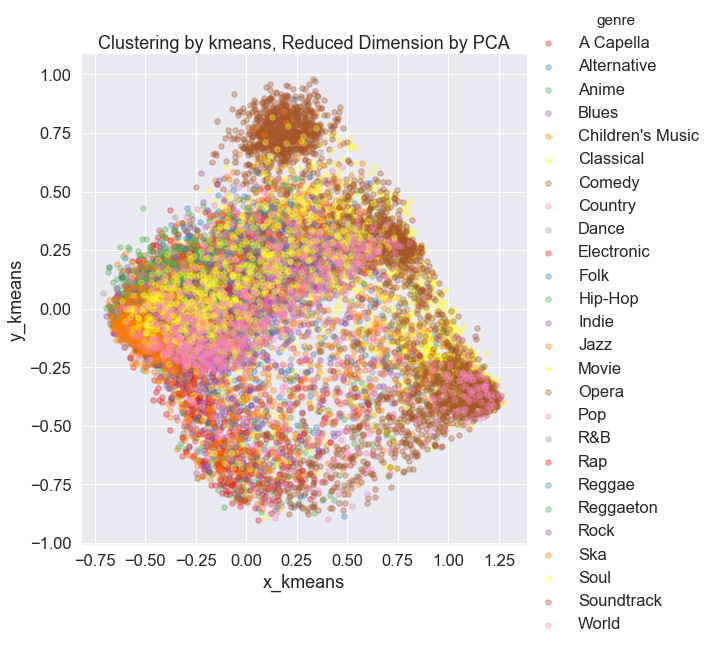

In [444]:
sns.set(font_scale=1.5)

sns.lmplot(data=test, x='x_kmeans', y='y_kmeans', hue='genre', fit_reg=False, legend=True, size=8, palette='Set1',
           scatter_kws={'alpha':0.35, 's':30})
plt.title("Clustering by kmeans, Reduced Dimension by PCA")

plt.savefig('kmeans_pca.png')

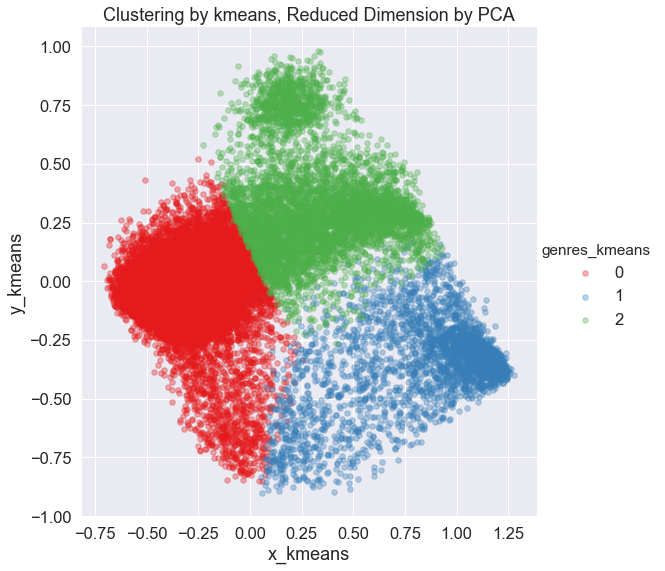

In [445]:
sns.set(font_scale=1.5)

sns.lmplot(data=test, x='x_kmeans', y='y_kmeans', hue='genres_kmeans', fit_reg=False, legend=True, size=8, palette='Set1',
           scatter_kws={'alpha':0.35, 's':30})
plt.title("Clustering by kmeans, Reduced Dimension by PCA")

plt.savefig('kmeans_pca.png')

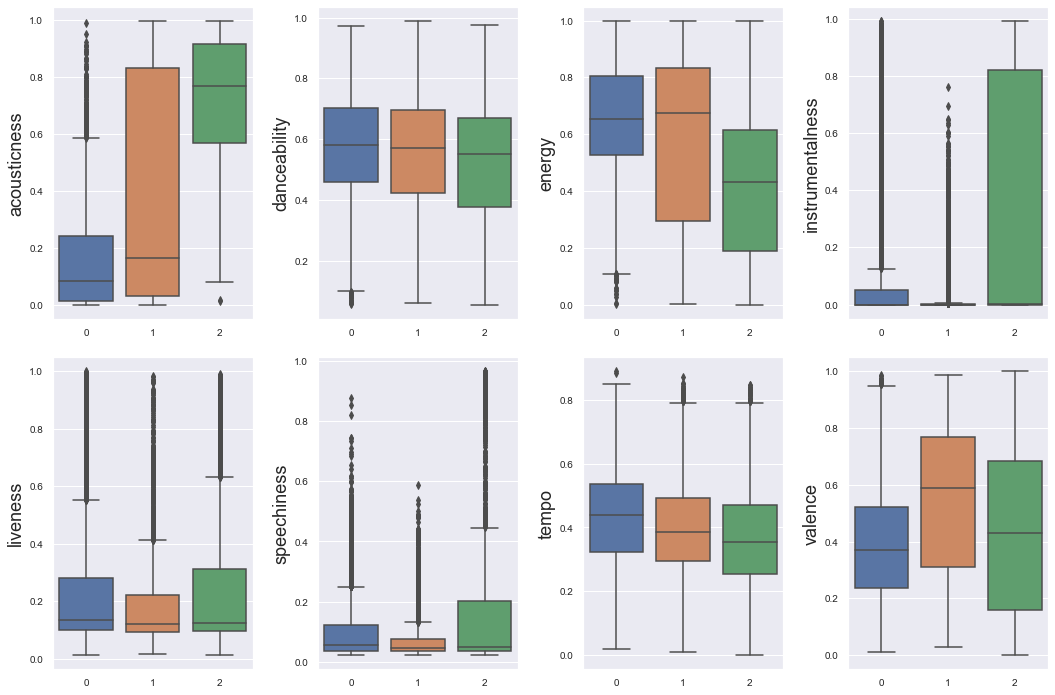

In [325]:
# Sometimes you can analyze an ordinal variable as numerical one
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 10))
for idx, feat in enumerate(audio_cols): 
    ax = axes[int(idx / 4), idx % 4] 
    sns.boxplot(x='genres_kmeans', y=feat, data=df_kmeans, ax=ax) 
    ax.set_xlabel('',fontsize=0.2) 
    ax.set_ylabel(feat) 
    ax.tick_params(labelsize=10)

fig.tight_layout();



## HEIRARCHIAL CLUSTERING

Agglomerative clustering is applied on mini data (test) which is subset of the main data.

In [446]:

from sklearn.cluster import AgglomerativeClustering
ward = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  


In [447]:
df.head()

genre            artist_name                         track_name  \
644  A Capella          Hyannis Sound       Absolutely (Story of a Girl)   
583  A Capella                   Glad          O Sacred Head Now Wounded   
584  A Capella  The Singers Unlimited    Killing Me Softly with His Song   
585  A Capella                   Glad  All Hail the Power of Jesus' Name   
586  A Capella  The Singers Unlimited                     Both Sides Now   

                   track_id  popularity  acousticness  danceability  \
644  4cDYqCte9iuEweE5fCwtaP           1         0.575         0.616   
583  4T0MhF3l1r8GGjVu9D68LG          10         0.793         0.315   
584  5QP9P48x0NmnLhCTRg3CYU          14         0.962         0.255   
585  1uooaC1KFcxzYbiHpbP0hi          10         0.733         0.487   
586  3zFfH4tfGuVWbjNdNUX9QI          13         0.970         0.303   

     duration_ms  energy  instrumentalness  ... speechiness     tempo  \
644       164280   0.569          0.000000  ...      0.0583  0.331854   
583       167760   0.187          0.000000  ...      0.0284  0.237648   
584       260067   0.140          0.001050  ...      0.0285  0.279314   
585       177640   0.263          0.000000  ...      0.0334  0.531182   
586       182002   0.118          0.000012  ...      0.0539  0.198603   

     time_signature valence  KMeansLabel         x         y         z  \
644             4/4   0.717          KM1 -0.010190  0.201047 -0.312842   
583             4/4   0.190          KM3  0.564620  0.231898  0.078087   
584             4/4   0.154          KM3  0.723679  0.283851  0.052733   
585             3/4   0.557          KM1  0.304085  0.277224 -0.205281   
586             4/4   0.122          KM3  0.746753  0.288930  0.038331   

        x_lda     y_lda  
644 -0.010190  0.201047  
583  0.564620  0.231898  
584  0.723679  0.283851  
585  0.304085  0.277224  
586  0.746753  0.288930  

[5 rows x 24 columns]

In [372]:
#df_heir_new = df_heir.drop("genre",axis=1) 
df_heir_new = df[audio_cols]
print(df_heir_new.shape)
y_pred = ward.fit_predict(df_heir_new)

(232725, 8)


MemoryError: 

In [332]:
len(y_pred)

23113

In [333]:
y_pred

array([0, 0, 0, ..., 0, 1, 1], dtype=int64)

In [303]:
test = pd.DataFrame(data=test, columns=audio_cols)

In [345]:
df_heir.head()

acousticness  danceability  energy  instrumentalness  liveness  \
584         0.962         0.255  0.1400           0.00105    0.1700   
588         0.574         0.706  0.5590           0.00000    0.0949   
593         0.830         0.685  0.4400           0.00000    0.2010   
595         0.947         0.233  0.0567           0.00000    0.1020   
606         0.967         0.176  0.0545           0.00365    0.1090   

     speechiness     tempo  valence      genre  genres_heir    x_heir  \
584       0.0285  0.279314   0.1540  A Capella            0 -0.746825   
588       0.0612  0.421585   0.6530  A Capella            0 -0.802950   
593       0.0304  0.436661   0.6940  A Capella            0 -0.815236   
595       0.0295  0.464112   0.0491  A Capella            0 -0.731028   
606       0.0345  0.227843   0.0610  A Capella            0 -0.728994   

       y_heir  
584  0.847738  
588  0.103194  
593  0.333433  
595  0.899080  
606  0.943981

In [338]:
df_heir_new["genres_heir"]= y_pred.tolist()

In [339]:
df_heir_new.head()

acousticness  danceability  energy  instrumentalness  liveness  \
584         0.962         0.255  0.1400           0.00105    0.1700   
588         0.574         0.706  0.5590           0.00000    0.0949   
593         0.830         0.685  0.4400           0.00000    0.2010   
595         0.947         0.233  0.0567           0.00000    0.1020   
606         0.967         0.176  0.0545           0.00365    0.1090   

     speechiness     tempo  valence  genres_heir  
584       0.0285  0.279314   0.1540            0  
588       0.0612  0.421585   0.6530            0  
593       0.0304  0.436661   0.6940            0  
595       0.0295  0.464112   0.0491            0  
606       0.0345  0.227843   0.0610            0

In [340]:
df_heir_new["genres_heir"].value_counts()

1    12427
0     7800
2     2886
Name: genres_heir, dtype: int64

In [344]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_new = pca.fit_transform(df_heir)
x_h,y_h = zip(*X_new)
test['x_heir'] = x_h
test['y_heir'] = y_h

components = pca.components_
explained_variance = pca.explained_variance_
explained_variance_ratio = pca.explained_variance_ratio_
singular_values = pca.singular_values_

C:\Users\md\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\md\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


C:\Users\md\Anaconda3\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


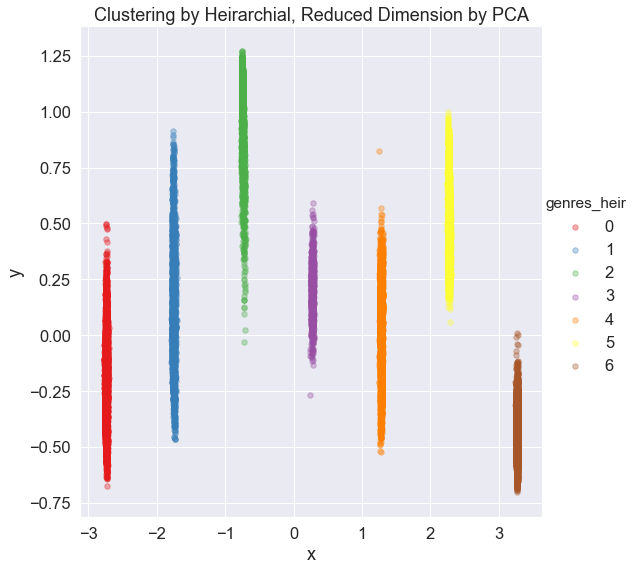

In [309]:
sns.set(font_scale=1.5)

sns.lmplot(data=test, x='x', y='y', hue='genres_heir', fit_reg=False, legend=True, size=8, palette='Set1',
           scatter_kws={'alpha':0.35, 's':30})
plt.title("Clustering by Heirarchial, Reduced Dimension by PCA")

plt.savefig('heir_pca.png')

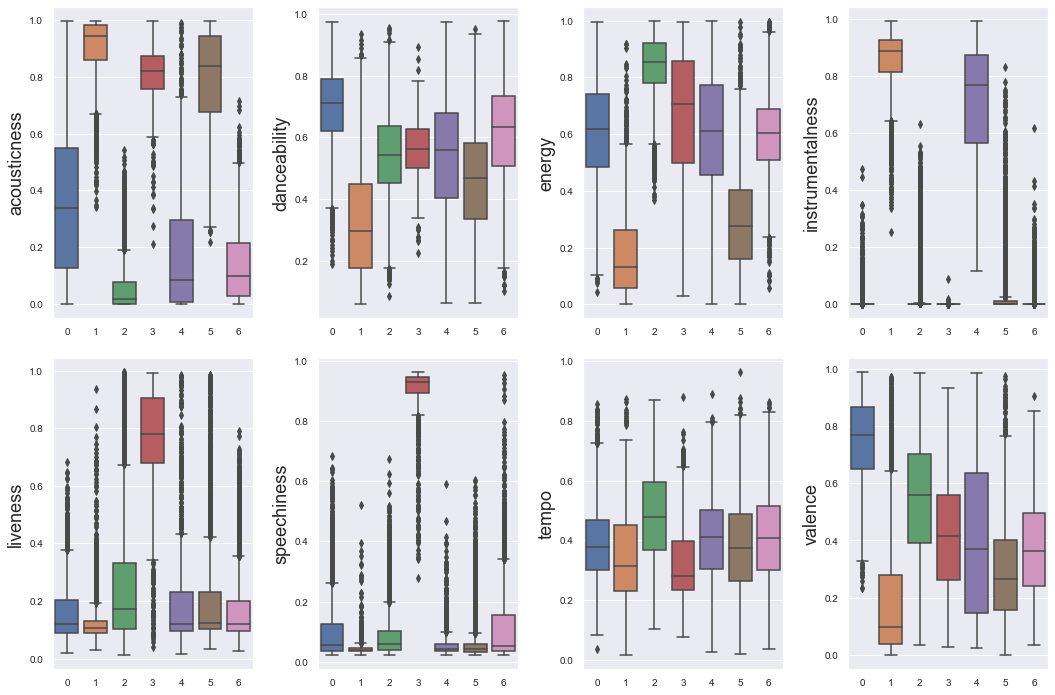

In [260]:
# Sometimes you can analyze an ordinal variable as numerical one
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 10))
for idx, feat in enumerate(audio_cols): 
    ax = axes[int(idx / 4), idx % 4] 
    sns.boxplot(x='genres_heir', y=feat, data=test, ax=ax) 
    ax.set_xlabel('',fontsize=0.2) 
    ax.set_ylabel(feat) 
    ax.tick_params(labelsize=10)

fig.tight_layout();

## SPECTRAL CLUSTERING

In [450]:
test.head()

acousticness  danceability  energy  instrumentalness  liveness  \
592         0.771         0.510  0.3260           0.00000    0.1200   
558         0.668         0.747  0.5050           0.00000    0.1010   
561         0.360         0.654  0.4270           0.00000    0.1500   
569         0.822         0.381  0.2640           0.00000    0.0978   
578         0.971         0.291  0.0979           0.00961    0.1510   

     speechiness     tempo  valence      genre  genres_kmeans  x_kmeans  \
592       0.0285  0.527108    0.418  A Capella              2  0.338681   
558       0.0746  0.431942    0.716  A Capella              2  0.039168   
561       0.0379  0.447060    0.811  A Capella              0 -0.141609   
569       0.0350  0.433080    0.439  A Capella              2  0.431857   
578       0.0302  0.378917    0.113  A Capella              2  0.746541   

     y_kmeans  
592  0.244163  
558  0.286526  
561  0.141333  
569  0.261508  
578  0.283263

In [451]:
from sklearn.cluster import SpectralClustering
# Building the clustering model 
spectral_model_rbf = SpectralClustering(n_clusters = 7, affinity ='rbf') 
  
# Training the model and Storing the predicted cluster labels 
labels_rbf = spectral_model_rbf.fit_predict(test[audio_cols]) 

In [282]:
labels_rbf

array([0, 0, 0, ..., 6, 1, 6])

In [286]:
df_spectral = test

In [287]:
df_spectral["genres_spectral"]= labels_rbf

In [288]:
df_spectral.head()

acousticness  danceability  energy  instrumentalness  liveness  \
584         0.962         0.255  0.1400          0.001050    0.1700   
597         0.984         0.261  0.0735          0.000025    0.0840   
568         0.846         0.603  0.3960          0.000000    0.0735   
575         0.970         0.257  0.0905          0.000048    0.2930   
577         0.691         0.390  0.1000          0.000000    0.0740   

     speechiness     tempo  valence  genres_spectral  
584       0.0285  0.279314    0.154                0  
597       0.0345  0.645960    0.187                0  
568       0.0665  0.445766    0.593                0  
575       0.0326  0.287243    0.136                0  
577       0.0367  0.388742    0.280                0

In [289]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_new = pca.fit_transform(df_spectral)
x,y = zip(*X_new)
test['x'] = x
test['y'] = y

components = pca.components_
explained_variance = pca.explained_variance_
explained_variance_ratio = pca.explained_variance_ratio_
singular_values = pca.singular_values_

C:\Users\md\Anaconda3\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


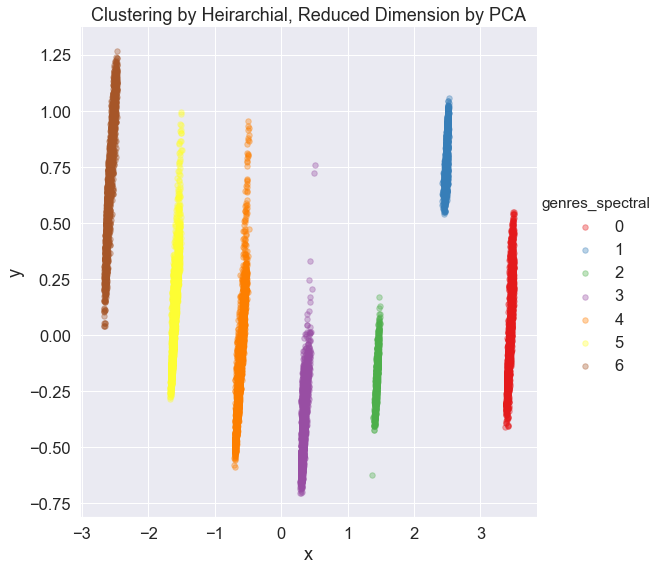

In [290]:
sns.set(font_scale=1.5)

sns.lmplot(data=df_spectral, x='x', y='y', hue='genres_spectral', fit_reg=False, legend=True, size=8, palette='Set1',
           scatter_kws={'alpha':0.35, 's':30})
plt.title("Clustering by Heirarchial, Reduced Dimension by PCA")

plt.savefig('heir_pca.png')